# Data Analyst Job Market Analysis

## Motivation
As a 3D artist with an informatics background, I analyze 
the data analyst job market to evaluate a possible career switch 
from 3D artist to data analyst.

## Part 1: USA Market Deep Dive
#### 1.1 Dataset Overview
#### 1.2 Data Cleaning 
#### 1.2.1 Salary Estimate in Min, Max and Middle Salary
#### 1.3 Salary Analysis
#### 1.3.1 Best 10 Cities
#### 1.3.2 Worst 10 Cities
#### 1.3.3 Compare the best and the worst cities in the USA
#### 1.4 Skills Requirements
#### 1.5 Geographic Distribution
#### 1.6 Industry Breakdown

## Part 2: Germany Market Insights
#### 2.1 Data Collection Methodology
#### "Daten manuell erhoben via StepStone, Indeed (Januar 2026)"
#### 2.2 Salary Comparison (USA vs Germany)
#### 2.3 Job Availability

## Part 3: Career Switch Analysis
#### 3.1 3D Artist vs Data Analyst (Germany)
#### 3.2 Transferable Skills
#### 3.3 Conclusions & Next Steps

## Part 1: USA Market Deep Dive
### 1.1 Dataset Overview

In [ ]:
import pandas as pd
import numpy as np

# 1. USA-Daten (Kaggle Dataset)
df_usa = pd.read_csv('data/DataAnalyst.csv',delimiter=',')

df_usa.head(1)



,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True


### 1.2 Data Cleaning 
#### 1.2.1 Salary Estimate in Min, Max and Middle Salary

In [491]:
df_usa_cleaned = df_usa.copy()

df_usa_cleaned['Salary Estimate']

#----------------- Clear Slary Estimate -----------------------------------------------------------------------------
df_usa_cleaned['Salary Estimate'] = df_usa_cleaned['Salary Estimate'].str.replace('K', ' ')
df_usa_cleaned['Salary Estimate'] = df_usa_cleaned['Salary Estimate'].str.replace('$', ' ')
df_usa_cleaned['Salary Estimate'] = df_usa_cleaned['Salary Estimate'].str.replace('-', '')

# Split the Min Salary Estimate and Max Salary Estimate 
df_usa_cleaned['Min Salary Estimate'] = df_usa_cleaned['Salary Estimate'].str.split(' ').str[1]
df_usa_cleaned['Max Salary Estimate'] = df_usa_cleaned['Salary Estimate'].str.split(' ').str[3]

# The Null Values from the Min Salary Estimate and Max Salary Estimate, 
# will be settet to the middle Values of the collum
Min_Salary_middle_Value = df_usa_cleaned['Min Salary Estimate'].mode()[0]
df_usa_cleaned.loc[df_usa_cleaned['Min Salary Estimate'].isnull(), 'Min Salary Estimate' ] = Min_Salary_middle_Value

Min_Salary_middle_Value = df_usa_cleaned['Max Salary Estimate'].mode()[0]
df_usa_cleaned.loc[df_usa_cleaned['Max Salary Estimate'].isnull(), 'Max Salary Estimate' ] = Min_Salary_middle_Value

# #df_usa_cleaned.loc[[2149]]
df_usa_cleaned.drop('Salary Estimate', axis=1, inplace=True)
# df_usa_cleaned.drop(df_usa_cleaned[df_usa_cleaned['Min Salary Estimate'].isnull()], axis=1, inplace=True)  

# Set the type of the collums to int
# Multyply by 1000 becose of the K in the original Salary Estimate
df_usa_cleaned['Min Salary Estimate'] = df_usa_cleaned['Min Salary Estimate'].astype(int) * 1000
df_usa_cleaned['Max Salary Estimate'] = df_usa_cleaned['Max Salary Estimate'].astype(int) * 1000

# Calculate the Aqvarage Salary
df_usa_cleaned['Average Salary Estimate'] = (df_usa_cleaned['Min Salary Estimate'] + df_usa_cleaned['Max Salary Estimate'] ) / 2  

#----------------- Clear Location -----------------------------------------------------------------------------

# Extract city (before the comma)
df_usa_cleaned['City'] = df_usa_cleaned['Location'].str.split(',').str[0].str.strip()

# Extract state (after the comma)
df_usa_cleaned['State'] = df_usa_cleaned['Location'].str.split(',').str[1].str.strip()

# Converrt to String
# df_usa_cleaned['City'] = df_usa_cleaned['City'].astype('string')
# df_usa_cleaned['State'] = df_usa_cleaned['State'].astype('string')

# Delete the Location Collum
# df_usa_cleaned.drop('Location', axis=1, inplace=True)
df_usa_cleaned.info()

# Check
# print("\nBeispiele:")
# print(df_usa_cleaned[['Location', 'City', 'State']].head(10))

# Identify remote jobs
df_usa_cleaned['Is_Remote'] = df_usa_cleaned['Location'].str.contains('Remote', case=False, na=False)

# df_usa_cleaned.info()
df_usa_cleaned.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2253 non-null   int64  
 1   Job Title                2253 non-null   object 
 2   Job Description          2253 non-null   object 
 3   Rating                   2253 non-null   float64
 4   Company Name             2252 non-null   object 
 5   Location                 2253 non-null   object 
 6   Headquarters             2253 non-null   object 
 7   Size                     2253 non-null   object 
 8   Founded                  2253 non-null   int64  
 9   Type of ownership        2253 non-null   object 
 10  Industry                 2253 non-null   object 
 11  Sector                   2253 non-null   object 
 12  Revenue                  2253 non-null   object 
 13  Competitors              2253 non-null   object 
 14  Easy Apply              

,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Sector,Revenue,Competitors,Easy Apply,Min Salary Estimate,Max Salary Estimate,Average Salary Estimate,City,State,Is_Remote
0,0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,...,Non-Profit,$100 to $500 million (USD),-1,True,37000,66000,51500.0,New York,NY,False


#### 1.3 Salary Analysis

In [492]:
# Salaries:
# Top 10 highest-paying cities

# Calculate average salary per city
# **Example:**
# groupby():
# Before (individual rows):               # After (grouped):
# Job 1: New York, $70,000                # New York: [$70,000, $80,000, $90,000]
# Job 4: Boston, $75,000                  # Boston: [$65,000, $75,000]
# Job 5: New York, $90,000

# agg():
# - Take the column `'Max Salary Estimate'`   # New York: [$70,000, $80,000, $90,000]     # Boston: [$65,000, $75,000]
# - Calculate **two things**:                 #   → mean = (70000 + 80000 + 90000) / 3 = $80,000   #   → mean = (65000 + 75000) / 2 = $70,000
#   - `'mean'` = average                      #   → count = 3 jobs                                #   → count = 2 jobs
#   - `'count'` = how many jobs

city_salary = df_usa_cleaned.groupby('City').agg({
    'Average Salary Estimate': ['mean', 'count']
}).round(0)

# Only cities with at least 5 jobs
# Rename Columns
city_salary.columns = ['Avg_Salary', 'Job_Count']
# Add the cities with min 5 Jobs
city_salary = city_salary[city_salary['Job_Count'] >= 5]
#Sort the highter Salary first  
city_salary = city_salary.sort_values('Avg_Salary', ascending=False)

# Save the first 10 Citys with top salarys
top_10_cities = city_salary.head(10)

# Print TOP 10
print("\n" + "="*80)
print("TOP 10 BESTBEZAHLTE STÄDTE (min. 5 Jobs):")
print("="*80)
print(top_10_cities)




TOP 10 BESTBEZAHLTE STÄDTE (min. 5 Jobs):
               Avg_Salary  Job_Count
City                                
San Jose         108855.0         38
Cupertino        105885.0         13
Santa Clara      104636.0         22
Sunnyvale        102781.0         16
Menlo Park       101864.0         11
San Francisco     99273.0        119
Redwood City      97083.0         12
Fremont           97000.0          5
Palo Alto         93929.0         14
Oakland           92864.0         11


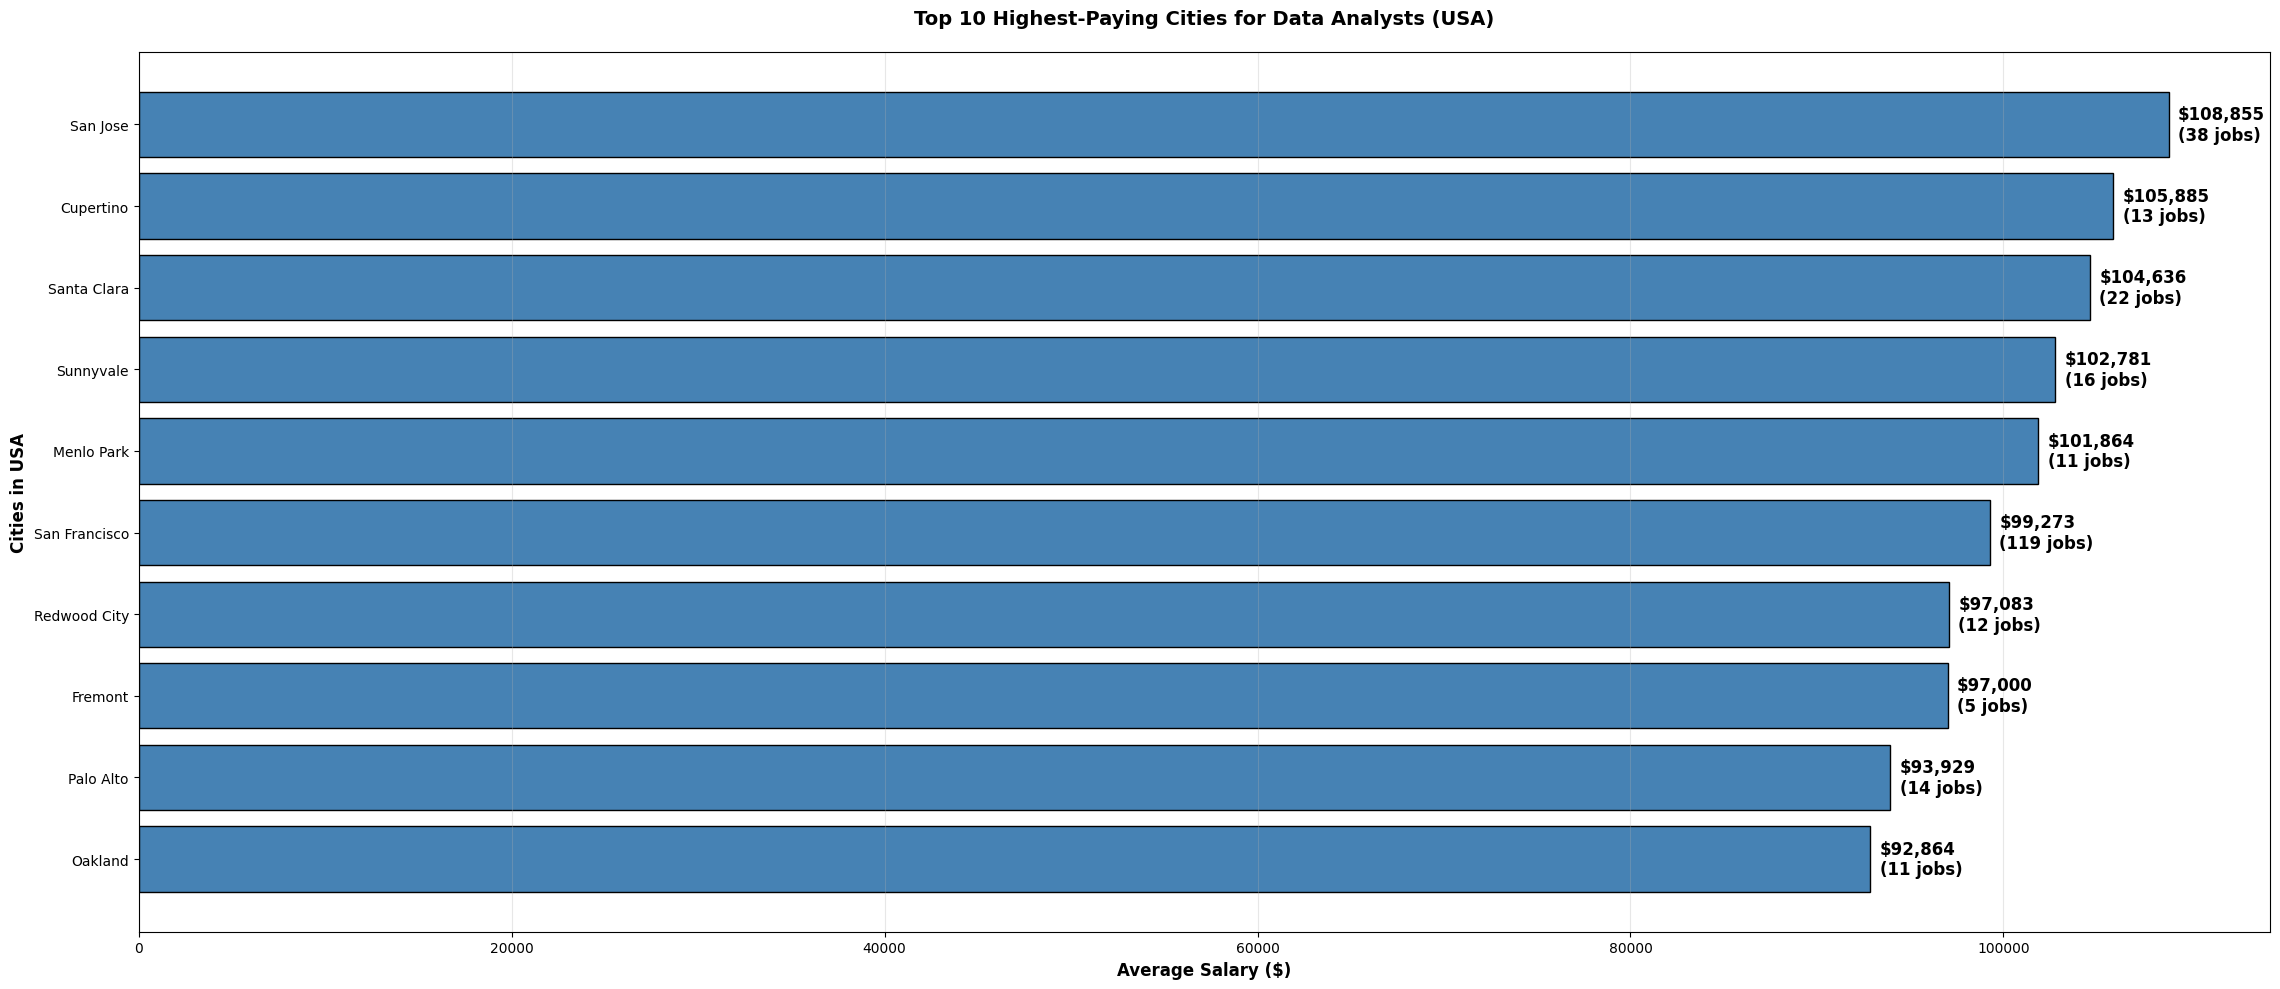


 Chart saved as 'top_10_cities_salary.png'


In [519]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create bar chart
plt.figure(figsize=(23, 10))

# Prepare data
best_cities = top_10_cities.index.tolist()
best_salaries = top_10_cities['Avg_Salary'].values
job_counts = top_10_cities['Job_Count'].values

# Bar chart
bars = plt.barh(best_cities, best_salaries, color='steelblue', edgecolor='black')

# Add job count as text
for i, (bar, count, salary) in enumerate(zip(bars, job_counts, best_salaries)):
    plt.text(salary + 500, i, f'${salary:,.0f}\n({int(count)} jobs)', 
             va='center', fontsize=12, fontweight='bold')

plt.xlabel('Average Salary ($)', fontsize=12, fontweight='bold')
plt.ylabel('Cities in USA', fontsize=12, fontweight='bold')

plt.title('Top 10 Highest-Paying Cities for Data Analysts (USA)', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.gca().invert_yaxis()  # Highest on top

plt.savefig('top_10_cities_salary.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Chart saved as 'top_10_cities_salary.png'")


In [494]:
# Calkullating the worst 10 payed citys
worst_10_cities = city_salary.tail(10)

# Print LAST 10
print("\n" + "="*80)
print("WARST 10 payed citys (min. 5 Jobs):")
print("="*80)
print(worst_10_cities)  


WARST 10 payed citys (min. 5 Jobs):
                Avg_Salary  Job_Count
City                                 
Pasadena           56500.0          9
Horsham            56062.0          8
Jacksonville       56000.0         19
Arlington          54625.0          8
Dallas             50576.0         66
Indianapolis       47500.0         17
Columbus           45379.0         29
Gainesville        42000.0          7
Lehi               38200.0          5
Salt Lake City     37659.0         22


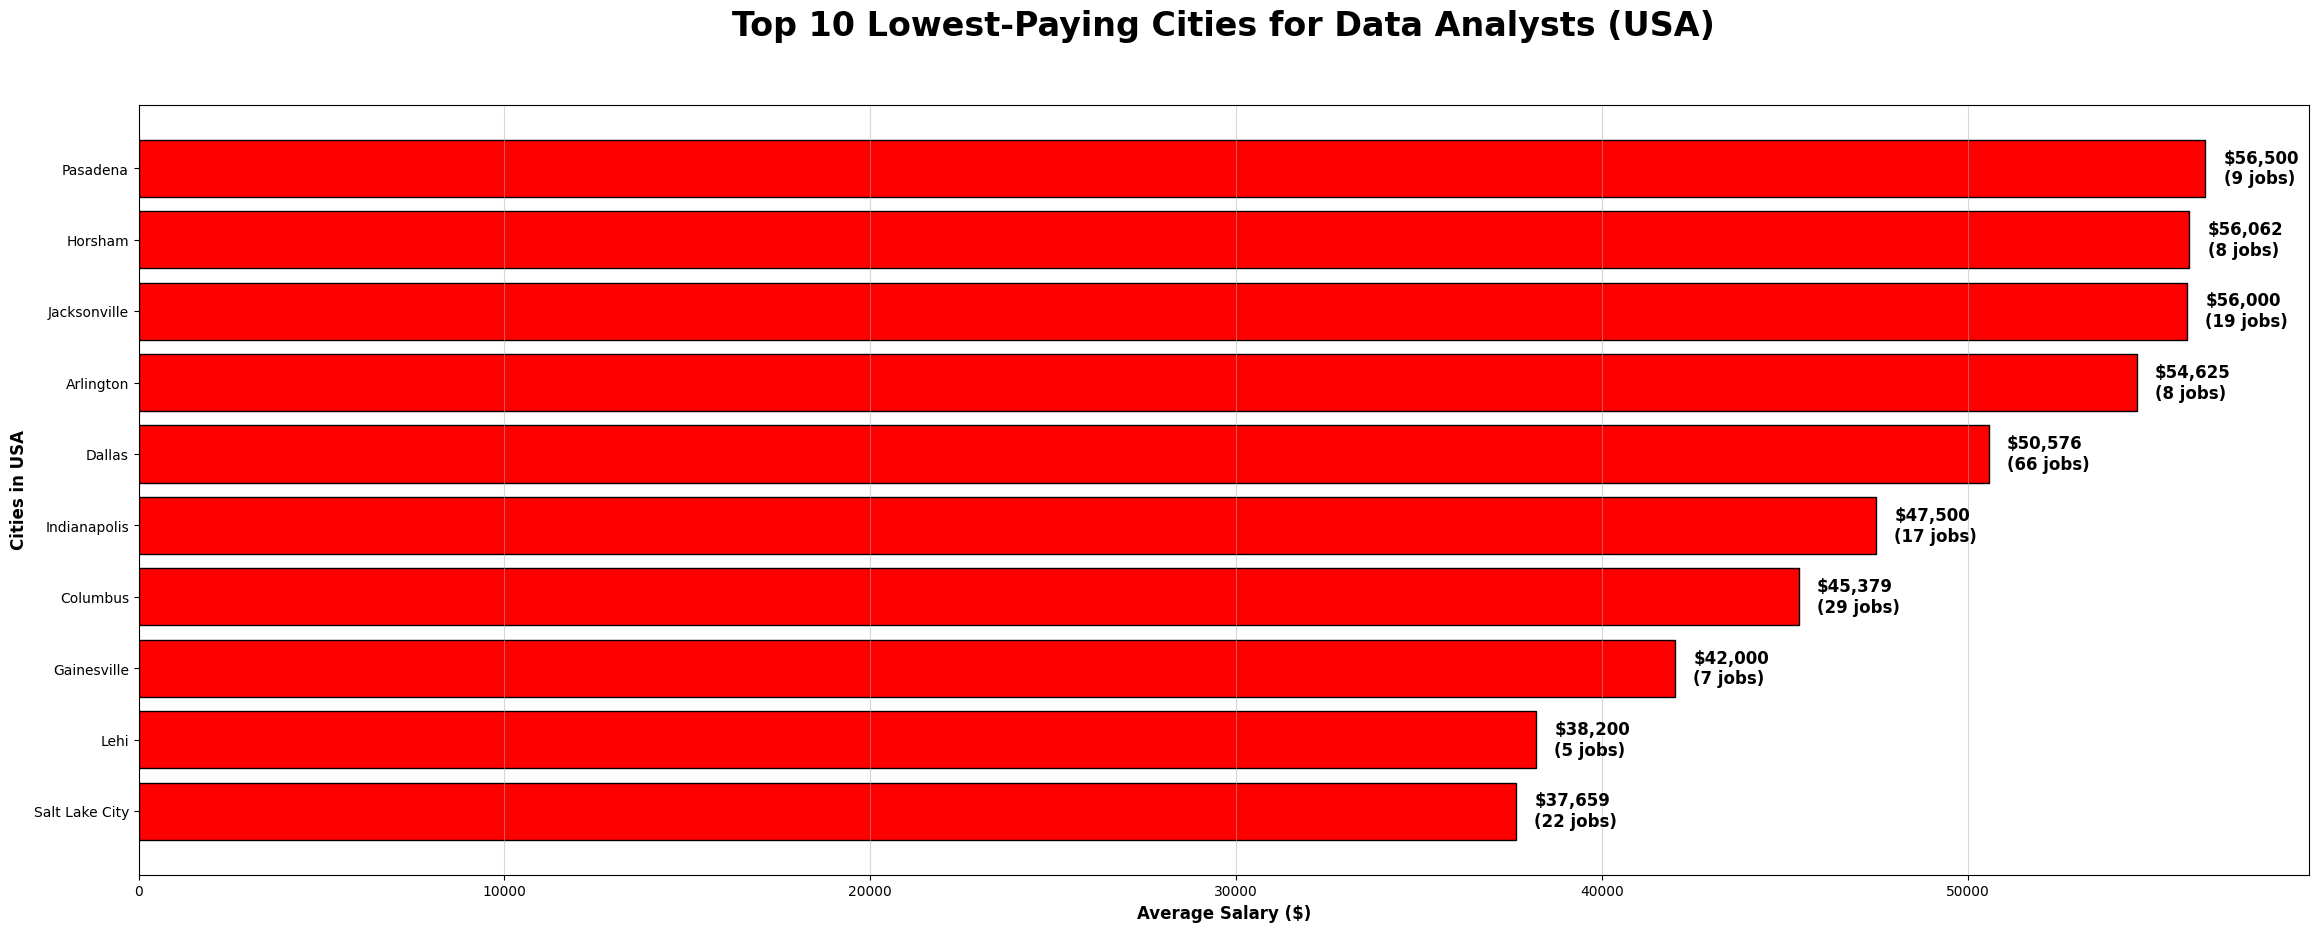

In [495]:
# Create bar chart
plt.figure(figsize=(28, 10))

# Prepare data
worst_cities = worst_10_cities.index.tolist()
worst_salaries = worst_10_cities['Avg_Salary'].values
job_counts = worst_10_cities['Job_Count'].values


# Bar chart
bars = plt.barh(worst_cities, worst_salaries, color='red', edgecolor='black')


# Add job count as text
for i, (bar, count, salary) in enumerate(zip(bars, job_counts, worst_salaries)):
    plt.text(salary + 500, i, f'${salary:,.0f}\n({int(count)} jobs)', 
             va='center', fontsize=12, fontweight='bold')

plt.title('Top 10 Lowest-Paying Cities for Data Analysts (USA)', fontsize=24, fontweight='bold', pad=50, y=1.0)    

plt.xlabel('Average Salary ($)', fontsize=12, fontweight='bold')
plt.ylabel('Cities in USA', fontsize=12, fontweight='bold')

plt.grid(axis='x', alpha=0.5)

plt.gca().invert_yaxis()  # Highest on top

plt.savefig('low_10_cities_salary.png', dpi=300, bbox_inches='tight')

plt.show()


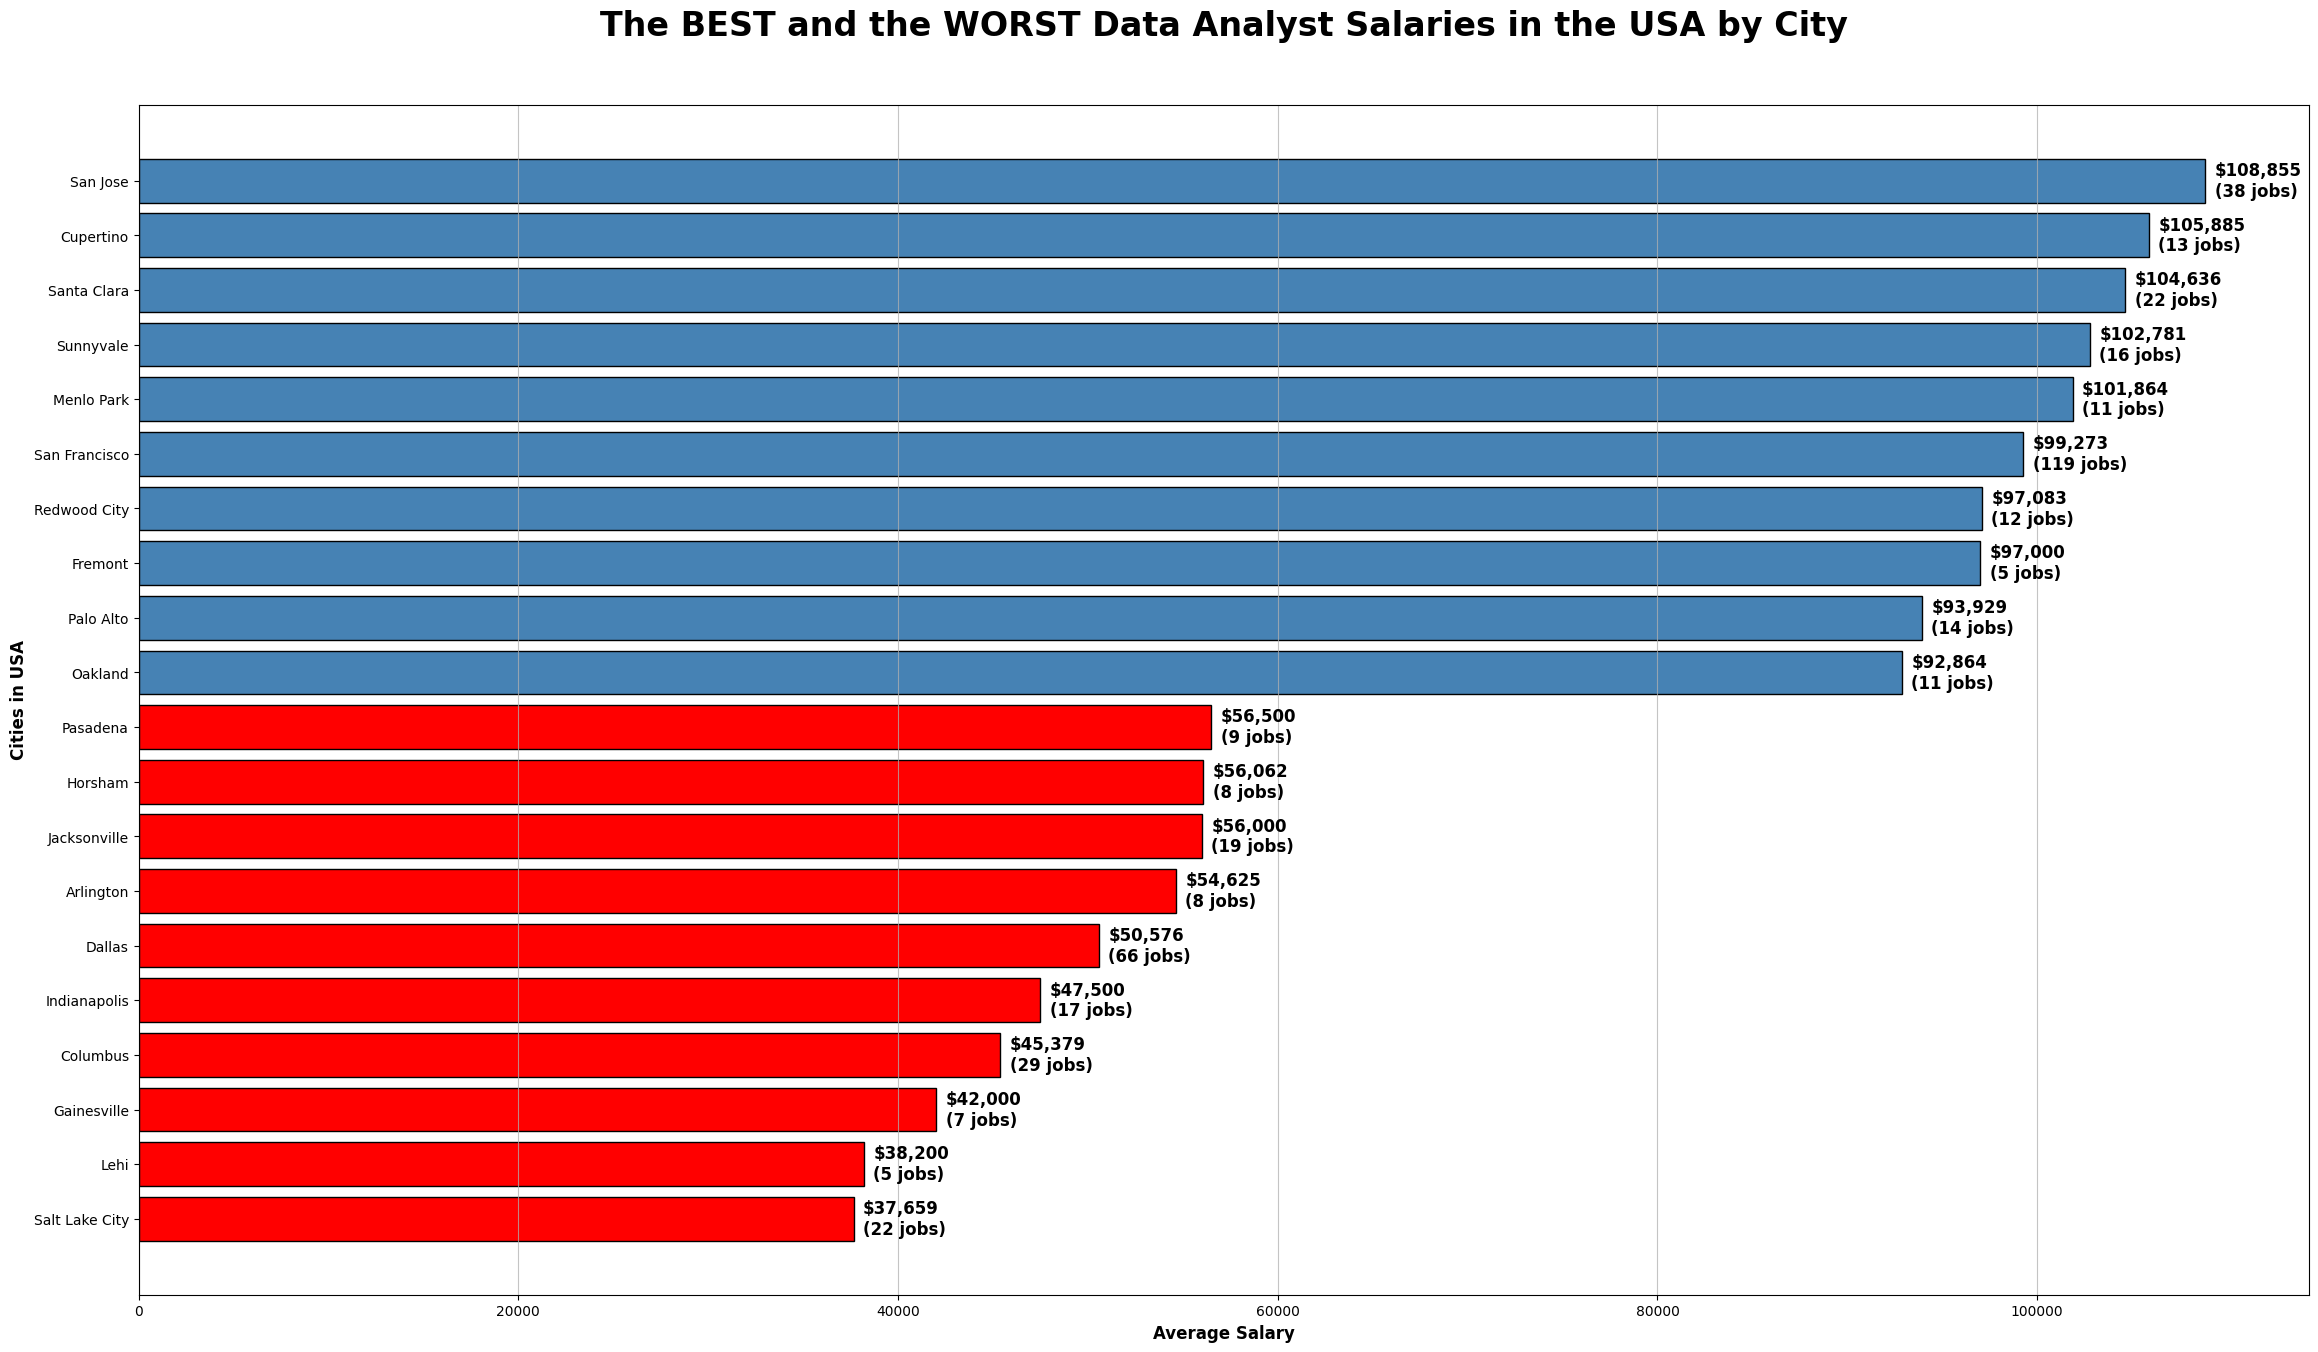

In [496]:
# Show the best and the worst cities in one chart
plt.figure(figsize=(28, 10))
plt.subplots_adjust(top=1.3)

# Data
# best_worst_cities = best_cities + worst_10_cities
df_best_and_worst_cities = pd.concat([top_10_cities, worst_10_cities])

best_and_worst_cities = df_best_and_worst_cities.index.tolist()
best_and_worst_salaries = df_best_and_worst_cities['Avg_Salary'].values
best_and_worst_job_counts = df_best_and_worst_cities['Job_Count'].values

# Define color per bar
colors = ['red' if i >= 10 else 'steelblue' for i in range(len(best_and_worst_cities))]

# Bar chart
bars = plt.barh(best_and_worst_cities, best_and_worst_salaries, color=colors, edgecolor='black')

# Add job count as text
for i, (bar, count, salary) in enumerate(zip(bars, best_and_worst_job_counts, best_and_worst_salaries)):
    plt.text(salary + 500, i, f'${salary:,.0f}\n({int(count)} jobs)', 
             va='center', fontsize=12, fontweight='bold')


plt.title('The BEST and the WORST Data Analyst Salaries in the USA by City',
          fontsize=24, fontweight='bold', pad=50, y=1)

plt.xlabel('Average Salary', fontsize=12, fontweight='bold')
plt.ylabel('Cities in USA', fontsize=12, fontweight='bold')

plt.grid(axis='x', alpha=0.75)

plt.gca().invert_yaxis()

plt.show()


In [471]:
# Compare the city with the best and warst salary in USA

# best_worst_cities = best_cities + worst_10_cities

top_city_name = top_10_cities.index[0]
top_city_salary = top_10_cities['Avg_Salary'].max()
# top_city_job_counts = top_10_cities[top_city_name]

worst_city_name = worst_10_cities.index[9]
worst_city_salary = worst_10_cities['Avg_Salary'].min()

procent = (worst_city_salary / top_city_salary) * 100
procent = round(procent, 2)

print("-"*90)
print("Compare the best and the worst cities in the USA ")
print("-"*90)
print('The best salaries for data analyst in USA are in ' + top_city_name + ' with salarie of ' + top_city_salary.astype('str') + '.')
print('The worst salaries for data analyst in USA are in ' + worst_city_name + ' with salarie of ' + worst_city_salary.astype('str') + '.')
print('The salary in' + worst_city_name +' is '  +  procent.astype('str') + '% from the salarie of the best salary city - ' + top_city_name + '.')



------------------------------------------------------------------------------------------
Compare the best and the worst cities in the USA 
------------------------------------------------------------------------------------------
The best salaries for data analyst in USA are in San Jose with salarie of 108855.0.
The worst salaries for data analyst in USA are in Salt Lake City with salarie of 37659.0.
The salary inSalt Lake City is 34.6% from the salarie of the best salary city - San Jose.


1.4 Skills Requirements

1.4.1 Skills aus Job Descriptions extrahieren

In [497]:
# Liste der wichtigsten Data Analyst Skills
data_skills = {
    # Programming
    'python': 'Python',
    'r programming|\\br\\b': 'R',
    'sql': 'SQL',
    'sas': 'SAS',
    'java': 'Java',
    
    # Visualisierung
    'tableau': 'Tableau',
    'power bi|powerbi': 'Power BI',
    'looker': 'Looker',
    'qlik': 'Qlik',
    
    # Python Libraries
    'pandas': 'Pandas',
    'numpy': 'NumPy',
    'matplotlib': 'Matplotlib',
    'seaborn': 'Seaborn',
    'plotly': 'Plotly',
    
    # Datenbanken
    'mysql': 'MySQL',
    'postgresql|postgres': 'PostgreSQL',
    'mongodb': 'MongoDB',
    'oracle': 'Oracle',
    
    # Cloud & Big Data
    'aws': 'AWS',
    'azure': 'Azure',
    'gcp|google cloud': 'Google Cloud',
    'hadoop': 'Hadoop',
    'spark': 'Spark',
    
    # Tools
    'excel': 'Excel',
    'google analytics': 'Google Analytics',
    'git': 'Git',
    'jupyter': 'Jupyter',
    
    # Statistik & ML
    'machine learning|\\bml\\b': 'Machine Learning',
    'statistics|statistical': 'Statistics',
    'data mining': 'Data Mining',
    'predictive modeling': 'Predictive Modeling',
    'a/b testing|ab testing': 'A/B Testing'
}

# Function to count skills
# Counts how often each skill appears in job descriptions
def count_skills(job_descriptions):

    skill_counts = {}
    
    for pattern, skill_name in data_skills.items():
        # Count in how many jobs the skill appears
        count = job_descriptions.str.contains(pattern, case=False, na=False, regex=True).sum()
        if count > 0:
            skill_counts[skill_name] = count
    
    return skill_counts

# Count skills
print("Analyzing skills in job descriptions...")
skill_counts = count_skills(df_usa_cleaned['Job Description'])

# Convert to DataFrame
skills_df = pd.DataFrame.from_dict(skill_counts, orient='index', columns=['Count'])
skills_df['Percentage'] = (skills_df['Count'] / len(df_usa_cleaned) * 100).round(1)
skills_df = skills_df.sort_values('Count', ascending=False)

print("\n" + "="*80)
print("TOP 20 MOST IN-DEMAND SKILLS:")
print("="*80)
print(skills_df.head(20))


Analyzing skills in job descriptions...

TOP 20 MOST IN-DEMAND SKILLS:
                  Count  Percentage
SQL                1389        61.7
Excel              1354        60.1
Statistics          839        37.2
Python              637        28.3
Tableau             620        27.5
R                   464        20.6
SAS                 411        18.2
Git                 298        13.2
AWS                 275        12.2
Data Mining         257        11.4
Power BI            248        11.0
Oracle              246        10.9
Java                204         9.1
Machine Learning    192         8.5
Hadoop              136         6.0
Looker              108         4.8
Spark                89         4.0
MySQL                82         3.6
Qlik                 76         3.4
Azure                64         2.8


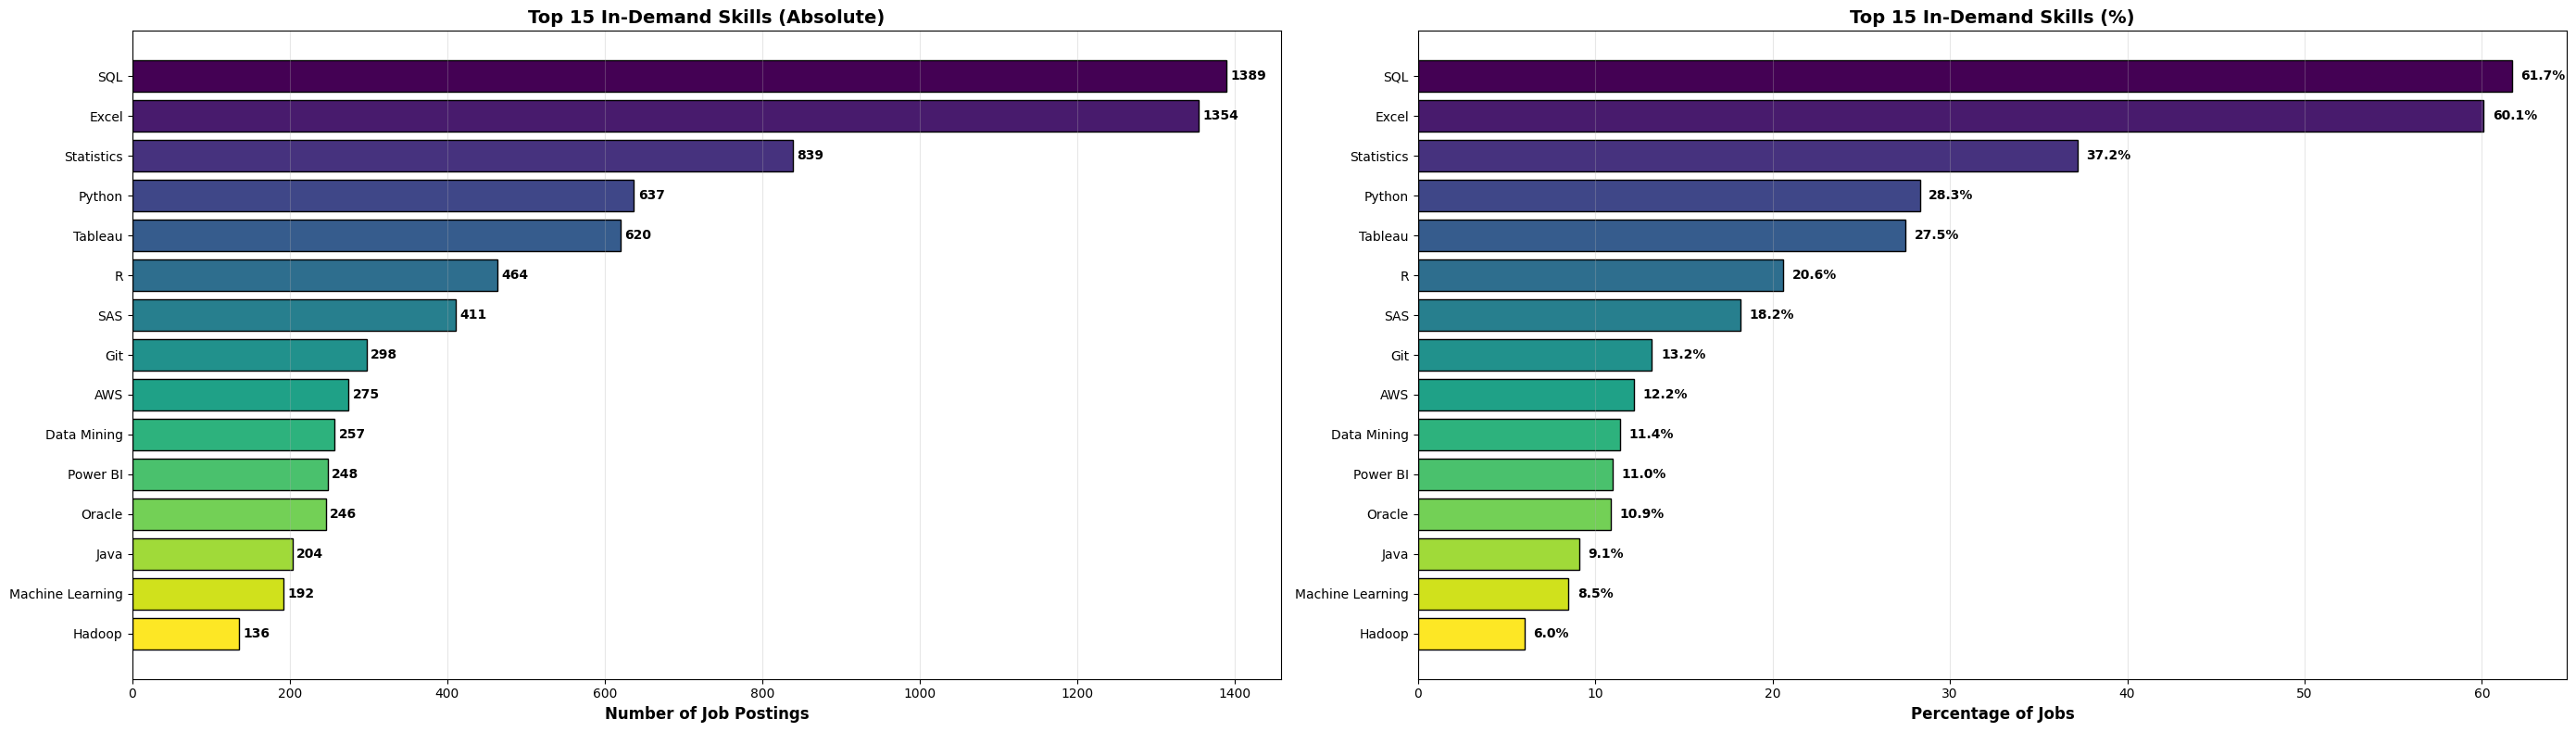


 Chart saved as 'top_skills_requirements.png'


In [498]:
# Visualization - Top 15 Skills
fig, axes = plt.subplots(1, 2, figsize=(28, 8))

# Plot 1: Absolute numbers --------------------------------------------------------------------------------
top_15 = skills_df.head(15)
colors = plt.cm.viridis(np.linspace(0, 1, 15))

axes[0].barh(top_15.index, top_15['Count'], color=colors, edgecolor='black')
axes[0].set_xlabel('Number of Job Postings', fontsize=12, fontweight='bold')
axes[0].set_title('Top 15 In-Demand Skills (Absolute)', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

# Display values
for i, (idx, row) in enumerate(top_15.iterrows()):
    axes[0].text(row['Count'] + 5, i, f"{int(row['Count'])}", 
                va='center', fontsize=10, fontweight='bold')

# Plot 2: Percentage ------------------------------------------------------------------------------------
axes[1].barh(top_15.index, top_15['Percentage'], color=colors, edgecolor='black')
axes[1].set_xlabel('Percentage of Jobs', fontsize=12, fontweight='bold')
axes[1].set_title('Top 15 In-Demand Skills (%)', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()

# Display percentages
for i, (idx, row) in enumerate(top_15.iterrows()):
    axes[1].text(row['Percentage'] + 0.5, i, f"{row['Percentage']:.1f}%", 
                va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('top_skills_requirements.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Chart saved as 'top_skills_requirements.png'")


In [499]:
# Define thresholds
# In more than 50% of jobs
must_have_threshold = 50  
# In 20-50% of jobs
nice_to_have_threshold = 20  

must_have = skills_df[skills_df['Percentage'] >= must_have_threshold]
nice_to_have = skills_df[(skills_df['Percentage'] >= nice_to_have_threshold) & 
                         (skills_df['Percentage'] < must_have_threshold)]
optional = skills_df[skills_df['Percentage'] < nice_to_have_threshold]

print("\n" + "="*80)
print(" MUST-HAVE SKILLS (>50% of jobs):")
print("="*80)
if len(must_have) > 0:
    print(must_have)
else:
    print("No skills appear in >50% of jobs")

print("\n" + "="*80)
print(" NICE-TO-HAVE SKILLS (20-50% of jobs):")
print("="*80)
print(nice_to_have.head(10))

print("\n" + "="*80)
print(" OPTIONAL SKILLS (<20% of jobs):")
print("="*80)
print(f"Count: {len(optional)} skills")



 MUST-HAVE SKILLS (>50% of jobs):
       Count  Percentage
SQL     1389        61.7
Excel   1354        60.1

 NICE-TO-HAVE SKILLS (20-50% of jobs):
            Count  Percentage
Statistics    839        37.2
Python        637        28.3
Tableau       620        27.5
R             464        20.6

 OPTIONAL SKILLS (<20% of jobs):
Count: 26 skills


In [ ]:
# Which skills are often requested together?
# Checks how often two skills appear together
def check_skill_combination(df, skill1, skill2):

    pattern1 = [p for p, s in data_skills.items() if s == skill1][0]
    pattern2 = [p for p, s in data_skills.items() if s == skill2][0]
    
    has_both = df['Job Description'].str.contains(pattern1, case=False, na=False, regex=True) & \
               df['Job Description'].str.contains(pattern2, case=False, na=False, regex=True)
    
    return has_both.sum()

# Check important combinations
combinations = [
    ('Python', 'SQL'),
    ('Tableau', 'SQL'),
    ('Python', 'Tableau'),
    ('Excel', 'SQL'),
    ('Python', 'Pandas'),
    ('R', 'SQL'),
    ('Power BI', 'SQL'),
    ('Machine Learning', 'Python')
]

print("\n" + "="*80)
print("COMMON SKILL COMBINATIONS:")
print("="*80)

combo_results = []
for skill1, skill2 in combinations:
    if skill1 in skills_df.index and skill2 in skills_df.index:
        count = check_skill_combination(df_usa_cleaned, skill1, skill2)
        percentage = (count / len(df_usa_cleaned) * 100)
        combo_results.append({
            'Combination': f'{skill1} + {skill2}',
            'Count': count,
            'Percentage': round(percentage, 1)
        })

combo_df = pd.DataFrame(combo_results).sort_values('Count', ascending=False)
print(combo_df.to_string(index=False))



HÄUFIGE SKILL-KOMBINATIONEN:
              Kombination  Count  Percentage
              Excel + SQL    888        39.4
             Python + SQL    561        24.9
            Tableau + SQL    531        23.6
                  R + SQL    377        16.7
         Python + Tableau    314        13.9
           Power BI + SQL    203         9.0
Machine Learning + Python    137         6.1
          Python + Pandas     40         1.8


#### 1.5 Geographic Distribution
##### 1.5.1 Top 10 Städte


TOP 10 CITIES (by number of jobs):
City
New York         310
Chicago          130
San Francisco    119
Austin            81
Los Angeles       80
Charlotte         78
Houston           72
Dallas            66
San Diego         62
Philadelphia      56
Name: count, dtype: int64


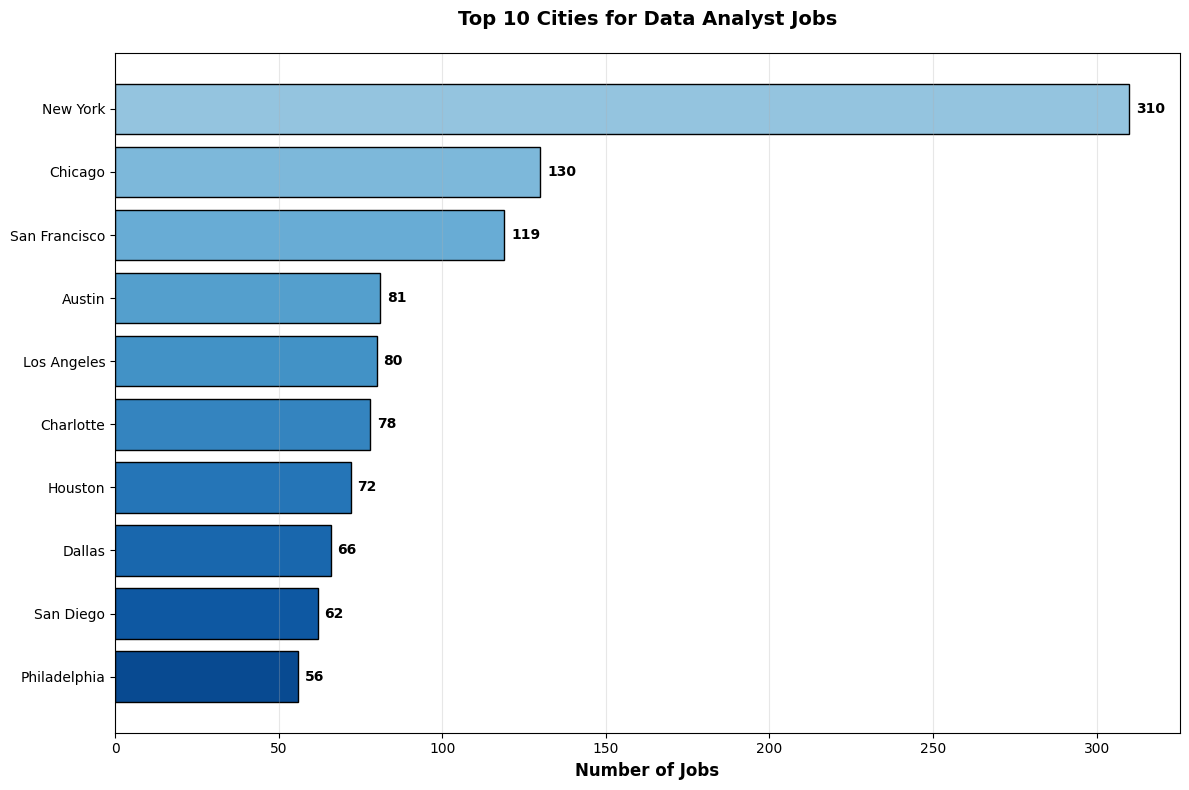


 Chart saved as 'top_10_cities_jobs.png'


In [520]:
# Number of jobs per city
city_counts = df_usa_cleaned['City'].value_counts().head(10)

print("\n" + "="*80)
print("TOP 10 CITIES (by number of jobs):")
print("="*80)
print(city_counts)

# Visualization
plt.figure(figsize=(12, 8))

colors = plt.cm.Blues(np.linspace(0.4, 0.9, 10))
bars = plt.barh(city_counts.index, city_counts.values, color=colors, edgecolor='black')

plt.xlabel('Number of Jobs', fontsize=12, fontweight='bold')
plt.title('Top 10 Cities for Data Analyst Jobs', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()

# Display numbers
for i, (city, count) in enumerate(city_counts.items()):
    plt.text(count + 2, i, f'{int(count)}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('top_10_cities_jobs.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Chart saved as 'top_10_cities_jobs.png'")


##### 1.5.2 Top 10 States


TOP 10 STATES (by number of jobs):
State
CA    626
TX    394
NY    345
IL    164
PA    114
AZ     97
NC     90
CO     88
NJ     86
WA     54
Name: count, dtype: int64


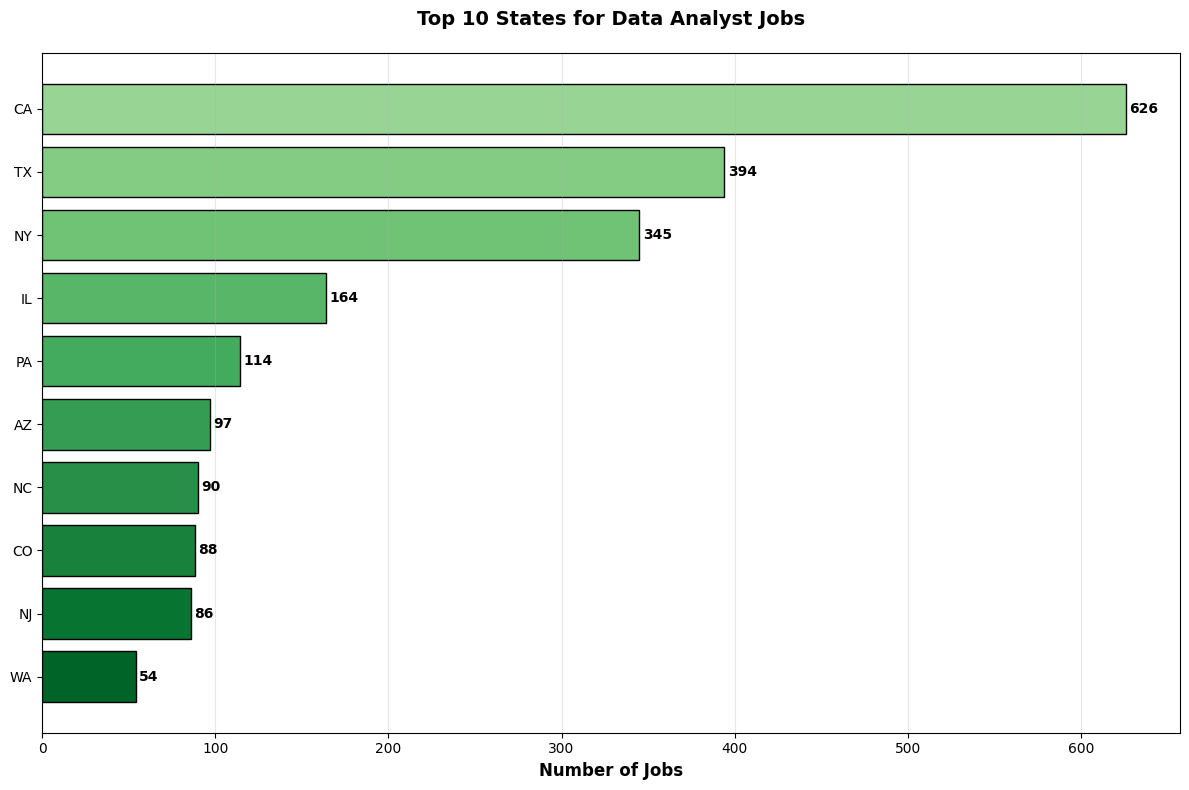


 Chart saved as 'top_10_states_jobs.png'


In [501]:
# Number of jobs per state
state_counts = df_usa_cleaned['State'].value_counts().head(10)

print("\n" + "="*80)
print("TOP 10 STATES (by number of jobs):")
print("="*80)
print(state_counts)

# Visualization
plt.figure(figsize=(12, 8))

colors = plt.cm.Greens(np.linspace(0.4, 0.9, 10))
bars = plt.barh(state_counts.index, state_counts.values, color=colors, edgecolor='black')

plt.xlabel('Number of Jobs', fontsize=12, fontweight='bold')
plt.title('Top 10 States for Data Analyst Jobs', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()

for i, (state, count) in enumerate(state_counts.items()):
    plt.text(count + 2, i, f'{int(count)}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('top_10_states_jobs.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Chart saved as 'top_10_states_jobs.png'")


##### 1.5.5 GEOGRAFISCHE ZUSAMMENFASSUNG


In [ ]:
print("\n" + "="*80)
print(" GEOGRAPHICAL SUMMARY:")
print("="*80)

# Number of jobs
total_jobs = len(df_usa_cleaned)
print(f"\nTotal Jobs: {total_jobs}")

# Cities
city_counts = df_usa_cleaned['City'].value_counts()
print(f"\nNumber of Cities: {df_usa_cleaned['City'].nunique()}")
print(f"Top City: {city_counts.index[0]} with {int(city_counts.values[0])} jobs")

# States
state_counts = df_usa_cleaned['State'].value_counts()
print(f"\nNumber of States: {df_usa_cleaned['State'].nunique()}")
print(f"Top State: {state_counts.index[0]} with {int(state_counts.values[0])} jobs")

# If salary data exists
if 'Salary_Clean' in df_usa_cleaned.columns:
    avg_salary = df_usa_cleaned['Salary_Clean'].mean()
    print(f"\nAverage Salary (all locations): ${avg_salary:,.0f}")

print("\n" + "="*80)



📊 GEOGRAPHICAL SUMMARY:

Total Jobs: 2253

Number of Cities: 249
Top City: New York with 310 jobs

Number of States: 20
Top State: CA with 626 jobs



#### 1.6 Industry Breakdown
##### 1.6.1 Top 10 Branchen (nach Jobanzahl)

INDUSTRY ANALYSIS:
Total Jobs: 2253
With valid Industry: 1900
Without Industry (-1): 353
Different Industries: 88

TOP 10 INDUSTRIES (excluding -1):
Industry
IT Services                                325
Staffing & Outsourcing                     323
Health Care Services & Hospitals           151
Consulting                                 111
Computer Hardware & Software               111
Investment Banking & Asset Management       78
Enterprise Software & Network Solutions     69
Internet                                    65
Advertising & Marketing                     51
Banks & Credit Unions                       51
Name: count, dtype: int64


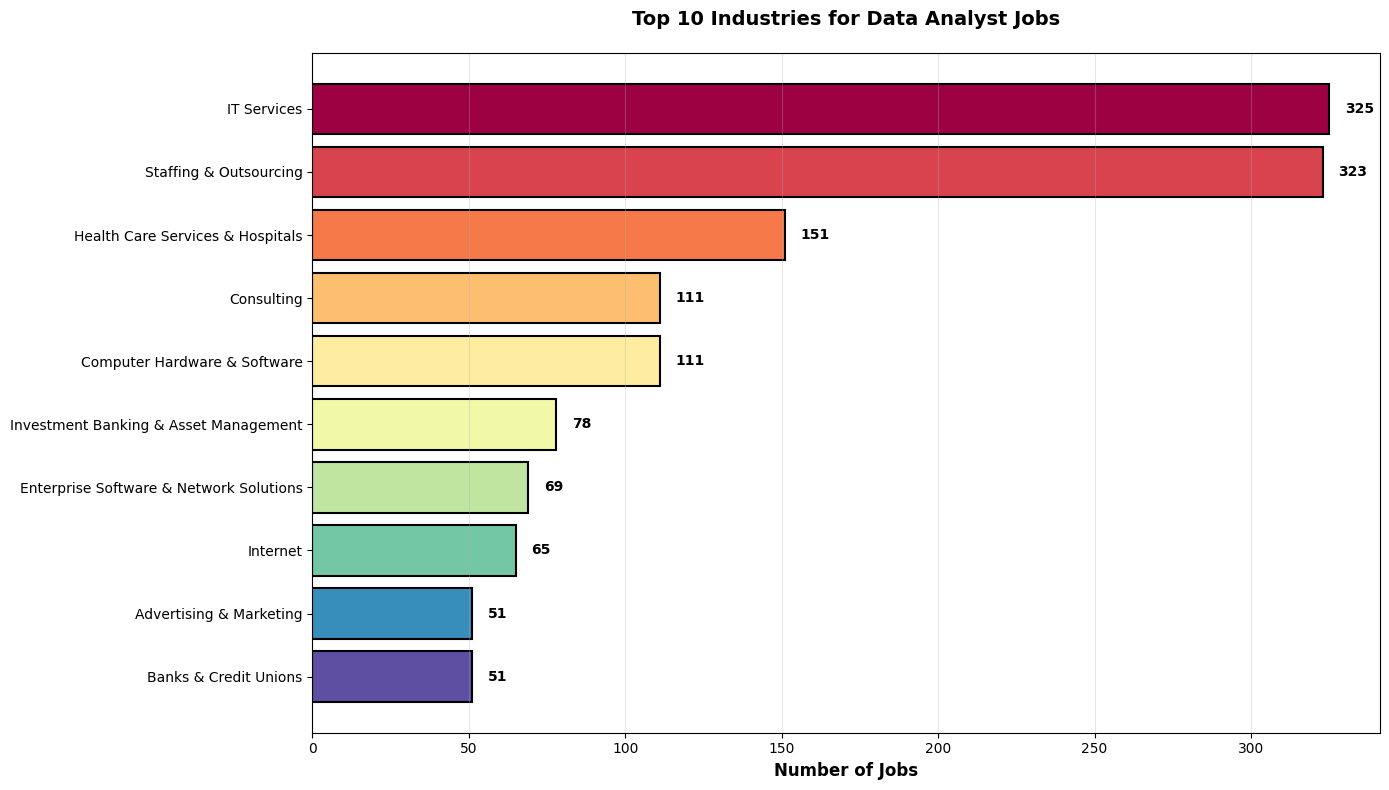


 Chart saved!


In [504]:
# Check industry data AND remove -1
print("="*80)
print("INDUSTRY ANALYSIS:")
print("="*80)
print(f"Total Jobs: {len(df_usa_cleaned)}")

# IMPORTANT: Filter out -1 and NaN
df_with_industry = df_usa_cleaned[
    (df_usa_cleaned['Industry'].notna()) & 
    (df_usa_cleaned['Industry'] != '-1')
].copy()

print(f"With valid Industry: {len(df_with_industry)}")
print(f"Without Industry (-1): {len(df_usa_cleaned) - len(df_with_industry)}")
print(f"Different Industries: {df_with_industry['Industry'].nunique()}")

# Top 10 industries (excluding -1)
industry_counts = df_with_industry['Industry'].value_counts().head(10)

print("\nTOP 10 INDUSTRIES (excluding -1):")
print(industry_counts)

# Visualization
plt.figure(figsize=(14, 8))

colors = plt.cm.Spectral(np.linspace(0, 1, 10))
bars = plt.barh(industry_counts.index, industry_counts.values, 
                color=colors, edgecolor='black', linewidth=1.5)

plt.xlabel('Number of Jobs', fontsize=12, fontweight='bold')
plt.title('Top 10 Industries for Data Analyst Jobs', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()

for i, (industry, count) in enumerate(industry_counts.items()):
    plt.text(count + 5, i, f'{int(count)}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('top_10_industries.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Chart saved!")


#### 1.6.2 Top 10 bestbezahlte Branchen


TOP 10 HIGHEST-PAYING INDUSTRIES (min. 5 jobs):
                                         Avg_Salary  Job_Count
Industry                                                      
Health Care Products Manufacturing          89800.0          5
Electrical & Electronic Manufacturing       84667.0          6
Biotech & Pharmaceuticals                   83106.0         33
Real Estate                                 80917.0         12
Internet                                    79662.0         65
Cable, Internet & Telephone Providers       79200.0          5
Venture Capital & Private Equity            78500.0          6
Computer Hardware & Software                77649.0        111
Enterprise Software & Network Solutions     77326.0         69
Accounting                                  76295.0         39


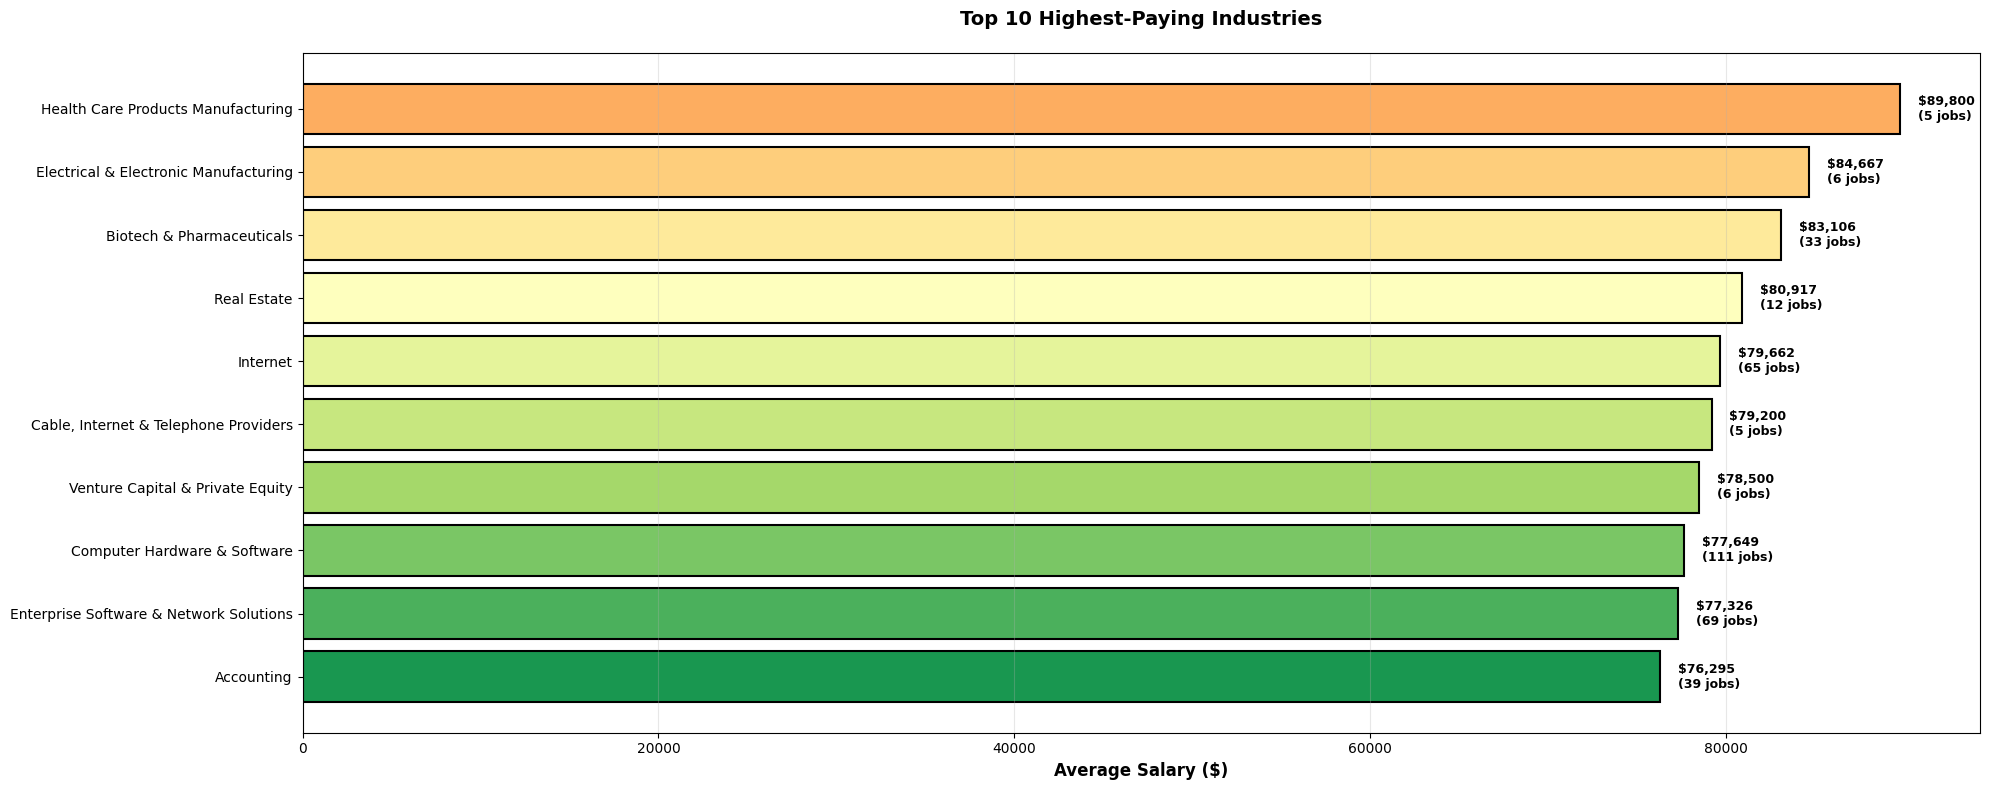


 Chart saved!


In [505]:
# Salary per industry (min 5 jobs)
if 'Average Salary Estimate' in df_usa_cleaned.columns:
    industry_salary = df_usa_cleaned.groupby('Industry').agg({
        'Average Salary Estimate': 'mean',
        'Job Title': 'count'
    }).round(0)
    
    industry_salary.columns = ['Avg_Salary', 'Job_Count']
    industry_salary = industry_salary[industry_salary['Job_Count'] >= 5]
    industry_salary = industry_salary.sort_values('Avg_Salary', ascending=False).head(10)
    
    print("\n" + "="*80)
    print("TOP 10 HIGHEST-PAYING INDUSTRIES (min. 5 jobs):")
    print("="*80)
    print(industry_salary)
    
    # Visualization
    plt.figure(figsize=(20, 8))
    
    colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, 10))
    bars = plt.barh(industry_salary.index, industry_salary['Avg_Salary'],
                    color=colors, edgecolor='black', linewidth=1.5)
    
    plt.xlabel('Average Salary ($)', fontsize=12, fontweight='bold')
    plt.title('Top 10 Highest-Paying Industries', fontsize=14, fontweight='bold', pad=20)
    plt.grid(axis='x', alpha=0.3)
    plt.gca().invert_yaxis()
    
    for i, (industry, row) in enumerate(industry_salary.iterrows()):
        plt.text(row['Avg_Salary'] + 1000, i, 
                f"${row['Avg_Salary']:,.0f}\n({int(row['Job_Count'])} jobs)", 
                va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('top_paying_industries.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n Chart saved!")



1.6.3 Zusammenfassung

In [521]:
print("\n" + "="*80)
print(" INDUSTRY SUMMARY:")
print("="*80)

# Number of industries
total_industries = df_usa_cleaned['Industry'].nunique()
print(f"\nTotal analyzed industries: {total_industries}")

# Industry with most jobs
top_industry = industry_counts.index[0]
top_count = industry_counts.values[0]
percentage = (top_count / len(df_usa_cleaned)) * 100

print(f"\n Industry with most jobs: {top_industry}")
print(f"   → {int(top_count)} jobs ({percentage:.1f}%)")

# Highest-paying industry
if 'Salary_Clean' in df_usa_cleaned.columns:
    best_industry = industry_salary.index[0]
    best_salary = industry_salary.iloc[0]['Avg_Salary']
    best_count = industry_salary.iloc[0]['Job_Count']
    
    print(f"\n Highest-paying industry: {best_industry}")
    print(f"   → ${best_salary:,.0f} average ({int(best_count)} jobs)")
    
    # Salary difference
    worst_industry = industry_salary.index[-1]
    worst_salary = industry_salary.iloc[-1]['Avg_Salary']
    
    difference = best_salary - worst_salary
    percent_diff = (difference / worst_salary) * 100
    
    print(f"\n Salary difference (Top 10 industries):")
    print(f"   Highest: ${best_salary:,.0f}")
    print(f"   Lowest: ${worst_salary:,.0f}")
    print(f"   Difference: ${difference:,.0f} ({percent_diff:.1f}% more)")

# Top 3 industries
print(f"\n Top 3 industries:")
for i, (industry, count) in enumerate(industry_counts.head(3).items(), 1):
    pct = (count / len(df_usa_cleaned)) * 100
    print(f"   {i}. {industry}: {int(count)} jobs ({pct:.1f}%)")

print("\n" + "="*80)



 INDUSTRY SUMMARY:

Total analyzed industries: 89

 Industry with most jobs: IT Services
   → 325 jobs (14.4%)

 Top 3 industries:
   1. IT Services: 325 jobs (14.4%)
   2. Staffing & Outsourcing: 323 jobs (14.3%)
   3. Health Care Services & Hospitals: 151 jobs (6.7%)



Part 2: Germany Market Insights

2.1 Data Collection Methodology

In [507]:
print("="*80)
print("PART 2: GERMANY MARKET DATA")
print("="*80)

print("\n DATA SOURCES:")
print("-" * 80)
print("USA Data:")
print("  → Source: Kaggle Dataset 'DataAnalyst.csv'")
print("  → Size: 2,253 Job Postings")
print("  → Period: 2020-2024")
print()
print("Germany Data:")
print("  → Source: Manual research (StepStone, Indeed, Glassdoor)")
print("  → Date: January 2026")
print("  → Location: Düsseldorf and Germany overall")
print("  → Method: Number of open positions and salary data collected")
print()
print("NOTE:")
print("   The Germany data is a snapshot and based on job listing aggregators.")
print("   It serves as a comparison reference.")
print("="*80)


PART 2: GERMANY MARKET DATA

 DATA SOURCES:
--------------------------------------------------------------------------------
USA Data:
  → Source: Kaggle Dataset 'DataAnalyst.csv'
  → Size: 2,253 Job Postings
  → Period: 2020-2024

Germany Data:
  → Source: Manual research (StepStone, Indeed, Glassdoor)
  → Date: January 2026
  → Location: Düsseldorf and Germany overall
  → Method: Number of open positions and salary data collected

NOTE:
   The Germany data is a snapshot and based on job listing aggregators.
   It serves as a comparison reference.


#### 2.2 Deutschland Daten erstellen

In [508]:
# Germany - Manual data (January 2026)
germany_data = {
    'Position': ['Data Analyst', 'Data Analyst', '3D Artist', '3D Artist'],
    'Level': ['Entry/Mid', 'Senior', 'Entry/Mid', 'Senior'],
    'Avg_Salary_EUR': [50100, 80000, 36400, 50000],
    'Job_Count_Duesseldorf': [497, None, 4, None],
    'Location': ['Düsseldorf', 'Düsseldorf', 'Düsseldorf', 'Düsseldorf'],
    'Source': ['StepStone 2026', 'StepStone 2026', 'StepStone 2026', 'StepStone 2026']
}

df_germany = pd.DataFrame(germany_data)

print("\n" + "="*80)
print("GERMANY DATA (Düsseldorf):")
print("="*80)
print(df_germany.to_string(index=False))

# Currency conversion (USD to EUR for comparison)
exchange_rate = 0.92  # Current rate (adjust if needed)
print(f"\n💱 Exchange rate for comparison: 1 USD = {exchange_rate} EUR")



GERMANY DATA (Düsseldorf):
    Position     Level  Avg_Salary_EUR  Job_Count_Duesseldorf   Location         Source
Data Analyst Entry/Mid           50100                  497.0 Düsseldorf StepStone 2026
Data Analyst    Senior           80000                    NaN Düsseldorf StepStone 2026
   3D Artist Entry/Mid           36400                    4.0 Düsseldorf StepStone 2026
   3D Artist    Senior           50000                    NaN Düsseldorf StepStone 2026

💱 Exchange rate for comparison: 1 USD = 0.92 EUR


2.2 Salary Comparison


COMPARISON: USA vs GERMANY (Data Analyst)

                    Metric      USA (in EUR)               Germany Difference
Average Salary (Entry/Mid)           €66,347               €50,100     +32.4%
             Senior Salary               N/A               €80,000        N/A
    Jobs in Dataset/Region 2,253 (total USA) 497 (Düsseldorf only)        N/A


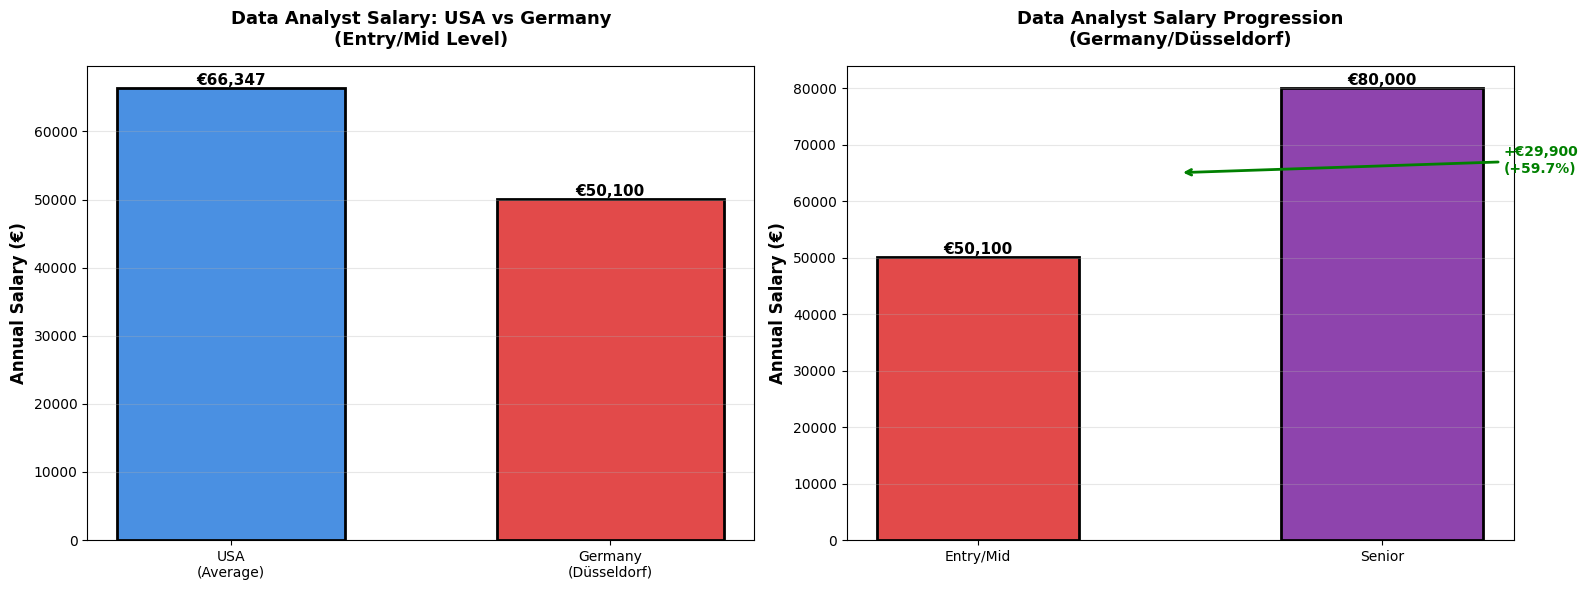


 Chart saved as 'usa_vs_germany_salary.png'


In [509]:
# USA average values
usa_avg_salary = df_usa_cleaned['Average Salary Estimate'].mean()
usa_median_salary = df_usa_cleaned['Average Salary Estimate'].median()
usa_job_count = len(df_usa_cleaned)

# Convert to EUR
usa_avg_salary_eur = usa_avg_salary * exchange_rate
usa_median_salary_eur = usa_median_salary * exchange_rate

# Germany values
germany_avg_salary = df_germany[df_germany['Level'] == 'Entry/Mid']['Avg_Salary_EUR'].values[0]
germany_senior_salary = df_germany[df_germany['Level'] == 'Senior']['Avg_Salary_EUR'].values[0]

print("\n" + "="*80)
print("COMPARISON: USA vs GERMANY (Data Analyst)")
print("="*80)

comparison_data = {
    'Metric': [
        'Average Salary (Entry/Mid)',
        'Senior Salary',
        'Jobs in Dataset/Region'
    ],
    'USA (in EUR)': [
        f'€{usa_avg_salary_eur:,.0f}',
        f'N/A',
        f'{usa_job_count:,} (total USA)'
    ],
    'Germany': [
        f'€{germany_avg_salary:,.0f}',
        f'€{germany_senior_salary:,.0f}',
        f'497 (Düsseldorf only)'
    ],
    'Difference': [
        f'{((usa_avg_salary_eur - germany_avg_salary) / germany_avg_salary * 100):+.1f}%',
        'N/A',
        'N/A'
    ]
}

df_comparison = pd.DataFrame(comparison_data)
print("\n" + df_comparison.to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Entry/Mid salaries
categories = ['USA\n(Average)', 'Germany\n(Düsseldorf)']
salaries_entry = [usa_avg_salary_eur, germany_avg_salary]
colors = ['#4A90E2', '#E24A4A']

bars1 = axes[0].bar(categories, salaries_entry, color=colors, 
                    edgecolor='black', linewidth=2, width=0.6)

axes[0].set_ylabel('Annual Salary (€)', fontsize=12, fontweight='bold')
axes[0].set_title('Data Analyst Salary: USA vs Germany\n(Entry/Mid Level)', 
                  fontsize=13, fontweight='bold', pad=15)
axes[0].grid(axis='y', alpha=0.3)

# Display values
for bar, val in zip(bars1, salaries_entry):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'€{val:,.0f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 2: Career progression Germany
levels = ['Entry/Mid', 'Senior']
salaries_de = [germany_avg_salary, germany_senior_salary]
colors_de = ['#E24A4A', '#8E44AD']

bars2 = axes[1].bar(levels, salaries_de, color=colors_de,
                    edgecolor='black', linewidth=2, width=0.5)

axes[1].set_ylabel('Annual Salary (€)', fontsize=12, fontweight='bold')
axes[1].set_title('Data Analyst Salary Progression\n(Germany/Düsseldorf)', 
                  fontsize=13, fontweight='bold', pad=15)
axes[1].grid(axis='y', alpha=0.3)

# Display values
for bar, val in zip(bars2, salaries_de):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'€{val:,.0f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Show increase
increase = germany_senior_salary - germany_avg_salary
increase_pct = (increase / germany_avg_salary) * 100
axes[1].annotate(f'+€{increase:,.0f}\n(+{increase_pct:.1f}%)',
                xy=(0.5, germany_avg_salary + increase/2),
                xytext=(1.3, germany_avg_salary + increase/2),
                fontsize=10, fontweight='bold', color='green',
                arrowprops=dict(arrowstyle='->', color='green', lw=2))

plt.tight_layout()
plt.savefig('usa_vs_germany_salary.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Chart saved as 'usa_vs_germany_salary.png'")


#### 2.3 Job Availability


JOB MARKET COMPARISON: Data Analyst vs 3D Artist (Düsseldorf)

    Position  Jobs (Düsseldorf) Entry/Mid Salary Senior Salary
Data Analyst                497          €50,100       €80,000
   3D Artist                  4          €36,400       €50,000

 RATIO:
   → Data Analyst jobs are 124x more frequent than 3D Artist jobs
   → Higher probability to get a job: 124x


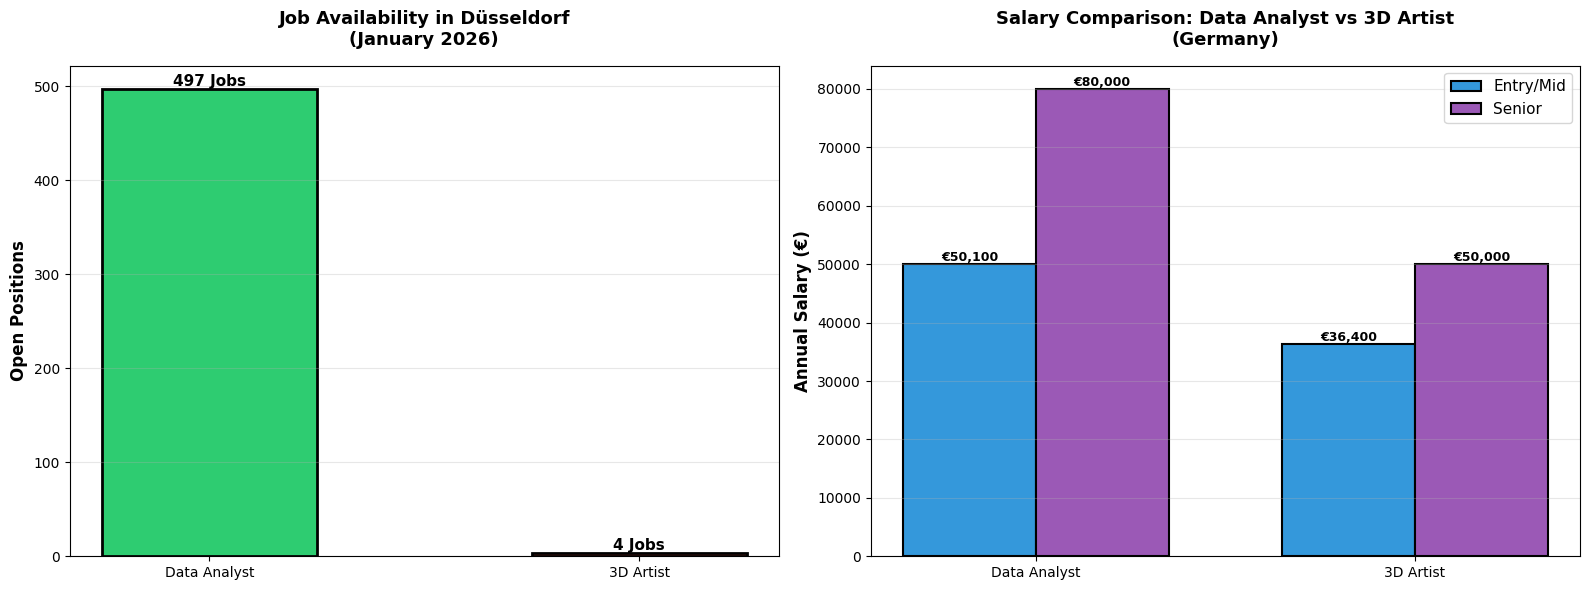


 Chart saved as 'data_analyst_vs_3d_artist_germany.png'


In [522]:
print("\n" + "="*80)
print("JOB MARKET COMPARISON: Data Analyst vs 3D Artist (Düsseldorf)")
print("="*80)

# Extract data
da_jobs = df_germany[df_germany['Position'] == 'Data Analyst']['Job_Count_Duesseldorf'].values[0]
artist_jobs = df_germany[df_germany['Position'] == '3D Artist']['Job_Count_Duesseldorf'].values[0]

da_salary = df_germany[(df_germany['Position'] == 'Data Analyst') & 
                       (df_germany['Level'] == 'Entry/Mid')]['Avg_Salary_EUR'].values[0]
artist_salary = df_germany[(df_germany['Position'] == '3D Artist') & 
                           (df_germany['Level'] == 'Entry/Mid')]['Avg_Salary_EUR'].values[0]

da_senior = df_germany[(df_germany['Position'] == 'Data Analyst') & 
                       (df_germany['Level'] == 'Senior')]['Avg_Salary_EUR'].values[0]
artist_senior = df_germany[(df_germany['Position'] == '3D Artist') & 
                           (df_germany['Level'] == 'Senior')]['Avg_Salary_EUR'].values[0]

# Ratio
job_ratio = da_jobs / artist_jobs

comparison_jobs = {
    'Position': ['Data Analyst', '3D Artist'],
    'Jobs (Düsseldorf)': [int(da_jobs), int(artist_jobs)],
    'Entry/Mid Salary': [f'€{da_salary:,.0f}', f'€{artist_salary:,.0f}'],
    'Senior Salary': [f'€{da_senior:,.0f}', f'€{artist_senior:,.0f}']
}

df_job_comparison = pd.DataFrame(comparison_jobs)
print("\n" + df_job_comparison.to_string(index=False))

print(f"\n RATIO:")
print(f"   → Data Analyst jobs are {job_ratio:.0f}x more frequent than 3D Artist jobs")
print(f"   → Higher probability to get a job: {job_ratio:.0f}x")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Job counts
positions = ['Data Analyst', '3D Artist']
job_counts = [da_jobs, artist_jobs]
colors_jobs = ['#2ECC71', '#E74C3C']

bars1 = axes[0].bar(positions, job_counts, color=colors_jobs,
                    edgecolor='black', linewidth=2, width=0.5)

axes[0].set_ylabel('Open Positions', fontsize=12, fontweight='bold')
axes[0].set_title('Job Availability in Düsseldorf\n(January 2026)', 
                  fontsize=13, fontweight='bold', pad=15)
axes[0].grid(axis='y', alpha=0.3)

for bar, val in zip(bars1, job_counts):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(val)} Jobs',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 2: Salary comparison
x = np.arange(2)
width = 0.35

bars_entry = axes[1].bar(x - width/2, [da_salary, artist_salary], width,
                         label='Entry/Mid', color='#3498DB', edgecolor='black', linewidth=1.5)
bars_senior = axes[1].bar(x + width/2, [da_senior, artist_senior], width,
                          label='Senior', color='#9B59B6', edgecolor='black', linewidth=1.5)

axes[1].set_ylabel('Annual Salary (€)', fontsize=12, fontweight='bold')
axes[1].set_title('Salary Comparison: Data Analyst vs 3D Artist\n(Germany)', 
                  fontsize=13, fontweight='bold', pad=15)
axes[1].set_xticks(x)
axes[1].set_xticklabels(positions)
axes[1].legend(fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

# Display values
for bars in [bars_entry, bars_senior]:
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'€{height:,.0f}',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('data_analyst_vs_3d_artist_germany.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Chart saved as 'data_analyst_vs_3d_artist_germany.png'")


2.5 Zusammenfassung Deutschland

In [512]:
print("\n" + "="*80)
print(" GERMANY SUMMARY:")
print("="*80)

print(f"\n🇩🇪 DÜSSELDORF DATA ANALYST MARKET:")
print(f"   → {int(da_jobs)} open positions (January 2026)")
print(f"   → Average salary: €{da_salary:,.0f}")
print(f"   → Senior salary: €{da_senior:,.0f}")
print(f"   → Salary increase Entry→Senior: +{(da_senior-da_salary)/da_salary*100:.1f}%")

print(f"\n USA vs GERMANY COMPARISON:")
usa_advantage = ((usa_avg_salary_eur - da_salary) / da_salary * 100)
if usa_advantage > 0:
    print(f"   → USA pays {usa_advantage:.1f}% more than Germany")
else:
    print(f"   → Germany pays {abs(usa_advantage):.1f}% more than USA")

print(f"\\ DATA ANALYST vs 3D ARTIST (Düsseldorf):")
print(f"   → {job_ratio:.0f}x more Data Analyst jobs")
print(f"   → Data Analyst earns {(da_salary-artist_salary)/artist_salary*100:.1f}% more (Entry/Mid)")
print(f"   → Data Analyst earns {(da_senior-artist_senior)/artist_senior*100:.1f}% more (Senior)")

print("\n" + "="*80)



 GERMANY SUMMARY:

🇩🇪 DÜSSELDORF DATA ANALYST MARKET:
   → 497 open positions (January 2026)
   → Average salary: €50,100
   → Senior salary: €80,000
   → Salary increase Entry→Senior: +59.7%

 USA vs GERMANY COMPARISON:
   → USA pays 32.4% more than Germany
\ DATA ANALYST vs 3D ARTIST (Düsseldorf):
   → 124x more Data Analyst jobs
   → Data Analyst earns 37.6% more (Entry/Mid)
   → Data Analyst earns 60.0% more (Senior)



## Part 3: Career Switch Analysis
#### 3.1 3D Artist vs Data Analyst (Germany)


PART 3: CAREER SWITCH ANALYSIS

3.1 - 3D ARTIST vs DATA ANALYST COMPARISON (Germany)

                     Criterion                             3D Artist                                     Data Analyst
 Job Availability (Düsseldorf)                 4 Jobs (very limited)                            497 Jobs (124x more!)
              Entry/Mid Salary                               €36,400                                          €50,100
                 Senior Salary                               €50,000                                          €80,000
       Salary Growth Potential                                  +37%                                             +60%
Number of Different Industries Limited (Gaming, VR/AR, Architecture) Very broad (Tech, Finance, Health, Retail, etc.)
          Remote Opportunities                                Medium                                             High
     Required Technical Skills     Blender, Maya, 3ds Max, Rendering             SQL, Py

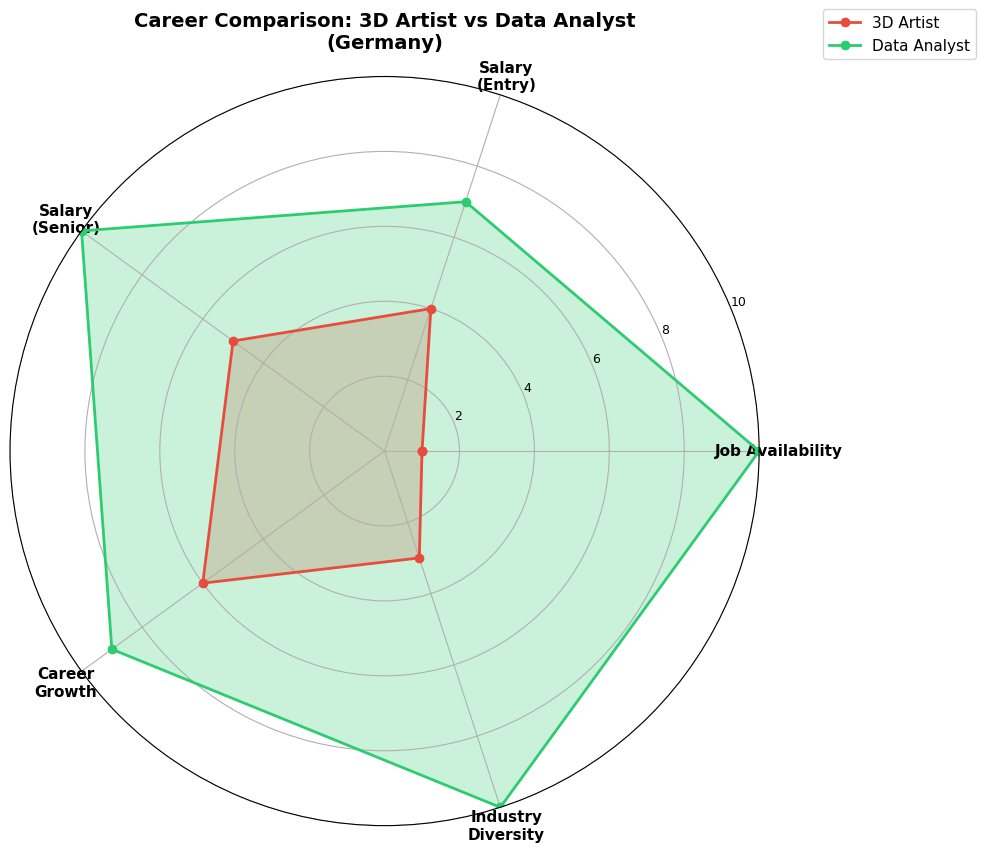


 Chart saved as 'career_comparison_radar.png'

 KEY INSIGHTS:

 ADVANTAGES OF DATA ANALYST:
   1. 124x more job opportunities in Düsseldorf
   2. 38% higher entry salary (€50,100 vs €36,400)
   3. 60% higher senior salary (€80,000 vs €50,000)
   4. Much broader industry options
   5. Better remote work opportunities

  DISADVANTAGES OF DATA ANALYST:
   1. Completely new skillset required
   2. Starting as junior (despite senior 3D experience)
   3. Less creative work
   4. More numbers-driven


In [514]:
print("="*80)
print("PART 3: CAREER SWITCH ANALYSIS")
print("="*80)

# Summary of key differences
print("\n" + "="*80)
print("3.1 - 3D ARTIST vs DATA ANALYST COMPARISON (Germany)")
print("="*80)

career_comparison = {
    'Criterion': [
        'Job Availability (Düsseldorf)',
        'Entry/Mid Salary',
        'Senior Salary',
        'Salary Growth Potential',
        'Number of Different Industries',
        'Remote Opportunities',
        'Required Technical Skills'
    ],
    '3D Artist': [
        '4 Jobs (very limited)',
        '€36,400',
        '€50,000',
        '+37%',
        'Limited (Gaming, VR/AR, Architecture)',
        'Medium',
        'Blender, Maya, 3ds Max, Rendering'
    ],
    'Data Analyst': [
        '497 Jobs (124x more!)',
        '€50,100',
        '€80,000',
        '+60%',
        'Very broad (Tech, Finance, Health, Retail, etc.)',
        'High',
        'SQL, Python, Excel, Tableau/Power BI'
    ]
}

df_career_comp = pd.DataFrame(career_comparison)
print("\n" + df_career_comp.to_string(index=False))

# Visualization - Radar Chart Comparison
categories = ['Job Availability', 'Salary\n(Entry)', 'Salary\n(Senior)', 
              'Career\nGrowth', 'Industry\nDiversity']

# Normalized values (0-10 scale)
artist_values = [1, 4, 5, 6, 3]  # 3D Artist
analyst_values = [10, 7, 10, 9, 10]  # Data Analyst

# Radar Chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Number of categories
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Close the circle
artist_values += artist_values[:1]
analyst_values += analyst_values[:1]
angles += angles[:1]

# Plot
ax.plot(angles, artist_values, 'o-', linewidth=2, label='3D Artist', color='#E74C3C')
ax.fill(angles, artist_values, alpha=0.25, color='#E74C3C')

ax.plot(angles, analyst_values, 'o-', linewidth=2, label='Data Analyst', color='#2ECC71')
ax.fill(angles, analyst_values, alpha=0.25, color='#2ECC71')

# Categories
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=11, fontweight='bold')

# Y-axis
ax.set_ylim(0, 10)
ax.set_yticks([2, 4, 6, 8, 10])
ax.set_yticklabels(['2', '4', '6', '8', '10'], size=9)
ax.grid(True)

# Title and legend
plt.title('Career Comparison: 3D Artist vs Data Analyst\n(Germany)', 
          size=14, fontweight='bold', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11)

plt.tight_layout()
plt.savefig('career_comparison_radar.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Chart saved as 'career_comparison_radar.png'")

# Key Insights
print("\n" + "="*80)
print(" KEY INSIGHTS:")
print("="*80)
print("\n ADVANTAGES OF DATA ANALYST:")
print("   1. 124x more job opportunities in Düsseldorf")
print("   2. 38% higher entry salary (€50,100 vs €36,400)")
print("   3. 60% higher senior salary (€80,000 vs €50,000)")
print("   4. Much broader industry options")
print("   5. Better remote work opportunities")

print("\n  DISADVANTAGES OF DATA ANALYST:")
print("   1. Completely new skillset required")
print("   2. Starting as junior (despite senior 3D experience)")
print("   3. Less creative work")
print("   4. More numbers-driven")


#### 3.2 Transferable Skills


3.2 - TRANSFERABLE SKILLS: 3D Artist → Data Analyst

           3D Artist Skill Relevance for Data Analyst                           How it Helps
   Computer Science Degree                      ⭐⭐⭐⭐⭐   Technical foundation already present
         Basic Programming                      ⭐⭐⭐⭐⭐ Understand programming logic (Python!)
        Data Visualization                      ⭐⭐⭐⭐⭐             Create charts & dashboards
Mastering Complex Software                       ⭐⭐⭐⭐ Learn new tools quickly (SQL, Tableau)
        Project Management                       ⭐⭐⭐⭐          Manage projects independently
      Client Communication                       ⭐⭐⭐⭐              Present & explain results
           Problem Solving                       ⭐⭐⭐⭐        Analyze and solve data problems
   Technical Understanding                       ⭐⭐⭐⭐         Understand databases & systems
       Attention to Detail                        ⭐⭐⭐                 Accurate data analysis
    Deadline-Ori

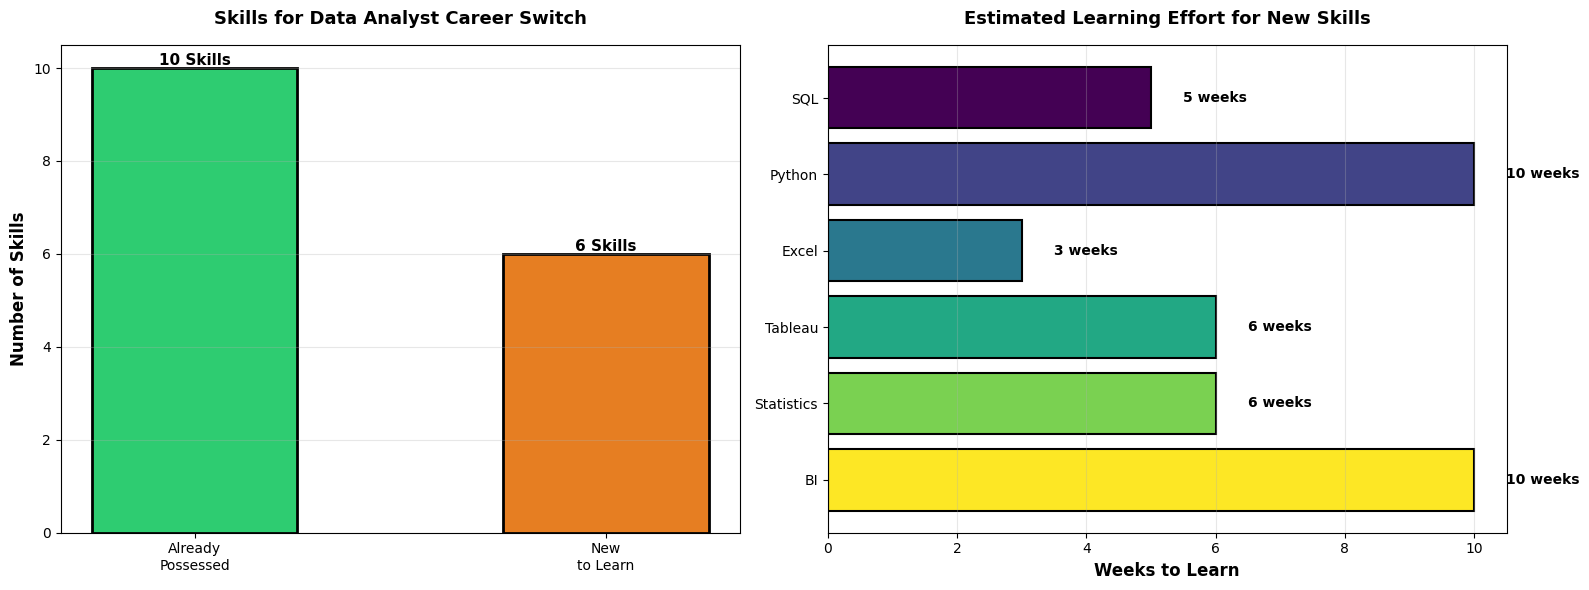


 Chart saved as 'skills_gap_analysis.png'

 ADVANTAGE:
   With a Computer Science degree and programming experience, the learning process
   is significantly faster than for complete career changers!


In [516]:
print("\n" + "="*80)
print("3.2 - TRANSFERABLE SKILLS: 3D Artist → Data Analyst")
print("="*80)

# Skills Mapping
transferable_skills = {
    '3D Artist Skill': [
        'Computer Science Degree',
        'Basic Programming',
        'Data Visualization',
        'Mastering Complex Software',
        'Project Management',
        'Client Communication',
        'Problem Solving',
        'Technical Understanding',
        'Attention to Detail',
        'Deadline-Oriented Work'
    ],
    'Relevance for Data Analyst': [
        '⭐⭐⭐⭐⭐',
        '⭐⭐⭐⭐⭐',
        '⭐⭐⭐⭐⭐',
        '⭐⭐⭐⭐',
        '⭐⭐⭐⭐',
        '⭐⭐⭐⭐',
        '⭐⭐⭐⭐',
        '⭐⭐⭐⭐',
        '⭐⭐⭐',
        '⭐⭐⭐'
    ],
    'How it Helps': [
        'Technical foundation already present',
        'Understand programming logic (Python!)',
        'Create charts & dashboards',
        'Learn new tools quickly (SQL, Tableau)',
        'Manage projects independently',
        'Present & explain results',
        'Analyze and solve data problems',
        'Understand databases & systems',
        'Accurate data analysis',
        'Deliver reports on time'
    ]
}

df_skills = pd.DataFrame(transferable_skills)
print("\n" + df_skills.to_string(index=False))

# New skills that need to be learned
print("\n" + "="*80)
print("🎓 NEW SKILLS REQUIRED:")
print("="*80)

new_skills_needed = {
    'Skill': [
        'SQL',
        'Python (pandas, numpy)',
        'Excel (advanced)',
        'Tableau / Power BI',
        'Basic Statistics',
        'Business Intelligence'
    ],
    'Priority': [
        'HIGH ⭐⭐⭐',
        'HIGH ⭐⭐⭐',
        'HIGH ⭐⭐⭐',
        'MEDIUM ⭐⭐',
        'MEDIUM ⭐⭐',
        'LOW ⭐'
    ],
    'Learning Time': [
        '4-6 weeks',
        '2-3 months',
        '2-4 weeks',
        '4-8 weeks',
        '1-2 months',
        '2-3 months'
    ],
    'Demand (USA)': [
        f'{skills_df.loc["SQL", "Percentage"]:.1f}%' if 'SQL' in skills_df.index else 'N/A',
        f'{skills_df.loc["Python", "Percentage"]:.1f}%' if 'Python' in skills_df.index else 'N/A',
        f'{skills_df.loc["Excel", "Percentage"]:.1f}%' if 'Excel' in skills_df.index else 'N/A',
        f'{skills_df.loc["Tableau", "Percentage"]:.1f}%' if 'Tableau' in skills_df.index else 'N/A',
        f'{skills_df.loc["Statistics", "Percentage"]:.1f}%' if 'Statistics' in skills_df.index else 'N/A',
        'N/A'
    ]
}

df_new_skills = pd.DataFrame(new_skills_needed)
print("\n" + df_new_skills.to_string(index=False))

# Visualization - Skills Gap
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Transferable Skills
transferable_count = len(df_skills)
skill_categories = ['Already\nPossessed', 'New\nto Learn']
skill_counts = [transferable_count, len(df_new_skills)]
colors = ['#2ECC71', '#E67E22']

bars1 = axes[0].bar(skill_categories, skill_counts, color=colors,
                    edgecolor='black', linewidth=2, width=0.5)

axes[0].set_ylabel('Number of Skills', fontsize=12, fontweight='bold')
axes[0].set_title('Skills for Data Analyst Career Switch', fontsize=13, fontweight='bold', pad=15)
axes[0].grid(axis='y', alpha=0.3)

for bar, val in zip(bars1, skill_counts):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(val)} Skills',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 2: Learning Effort (estimated weeks)
learning_times = {
    'SQL': 5,
    'Python': 10,
    'Excel': 3,
    'Tableau': 6,
    'Statistics': 6,
    'BI': 10
}

skills_list = list(learning_times.keys())
weeks_list = list(learning_times.values())
colors_skills = plt.cm.viridis(np.linspace(0, 1, len(skills_list)))

bars2 = axes[1].barh(skills_list, weeks_list, color=colors_skills,
                     edgecolor='black', linewidth=1.5)

axes[1].set_xlabel('Weeks to Learn', fontsize=12, fontweight='bold')
axes[1].set_title('Estimated Learning Effort for New Skills', fontsize=13, fontweight='bold', pad=15)
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()

for bar, val in zip(bars2, weeks_list):
    width = bar.get_width()
    axes[1].text(width + 0.5, bar.get_y() + bar.get_height()/2.,
                f'{int(val)} weeks',
                va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('skills_gap_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Chart saved as 'skills_gap_analysis.png'")

print("\n ADVANTAGE:")
print("   With a Computer Science degree and programming experience, the learning process")
print("   is significantly faster than for complete career changers!")



#### 3.3 Conclusions & Next Steps


3.3 - CONCLUSION & RECOMMENDATIONS

 ANALYSIS SUMMARY:
--------------------------------------------------------------------------------

DATA BASIS:
- USA: 2,253 Data Analyst jobs analyzed
- Germany: Manual research (Düsseldorf, January 2026)
- Skills: 32 different skills identified
- Industries: 88 different industries

KEY FINDINGS:

1.  JOB MARKET:
   → USA: Very large market (2,253 jobs in dataset)
   → Germany/Düsseldorf: 497 Data Analyst positions
   → Ratio: Data Analyst 124x more common than 3D Artist

2.  SALARIES (Germany):
   → Data Analyst Entry: €50,100 (+38% vs 3D Artist)
   → Data Analyst Senior: €80,000 (+60% vs 3D Artist)
   → Salary growth: +60% (Entry → Senior)

3.  SKILLS:
   → Must-Have: SQL (62%), Excel (60%)
   → Important: Python (28%), Tableau (28%)
   → 10 transferable skills from 3D Artist career
   → 6 new skills required

4.  INDUSTRIES:
   → Largest industries: IT Services (325 jobs)
   → Highest paid: Health Care Products Manufacturing
   → Variety: Jobs

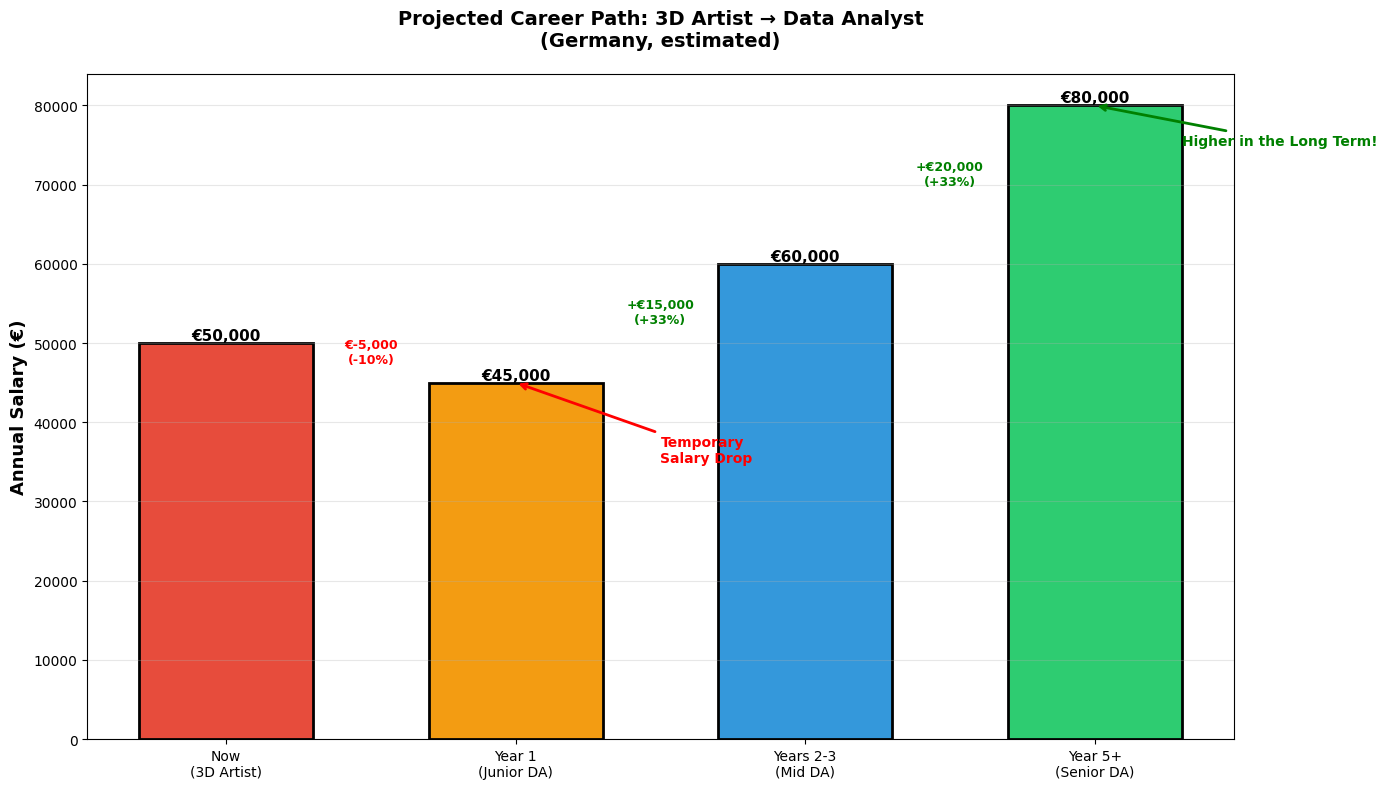


 Chart saved as 'career_path_projection.png'

 CONCLUSION:

Switching from 3D Artist to Data Analyst is REALISTIC and offers
better long-term career prospects:

- Significantly more job opportunities (124x)
- Higher salary potential (€80k+ as Senior)
- Broader industry options
- Good starting position with computer science background

The main drawback is the short-term career step back when starting
as a Junior, but with dedicated learning (6 months) and a strong portfolio,
a successful transition is very achievable.

Next step: Learn SQL & Python, build portfolio!

 ANALYSIS COMPLETE!


In [524]:
print("\n" + "="*80)
print("3.3 - CONCLUSION & RECOMMENDATIONS")
print("="*80)

print("\n ANALYSIS SUMMARY:")
print("-" * 80)

# Overall Overview
summary_stats = f"""
DATA BASIS:
- USA: {len(df_usa_cleaned):,} Data Analyst jobs analyzed
- Germany: Manual research (Düsseldorf, January 2026)
- Skills: {len(skills_df)} different skills identified
- Industries: {df_with_industry['Industry'].nunique()} different industries

KEY FINDINGS:

1.  JOB MARKET:
   → USA: Very large market ({len(df_usa_cleaned):,} jobs in dataset)
   → Germany/Düsseldorf: 497 Data Analyst positions
   → Ratio: Data Analyst 124x more common than 3D Artist

2.  SALARIES (Germany):
   → Data Analyst Entry: €50,100 (+38% vs 3D Artist)
   → Data Analyst Senior: €80,000 (+60% vs 3D Artist)
   → Salary growth: +60% (Entry → Senior)

3.  SKILLS:
   → Must-Have: SQL ({skills_df.loc['SQL', 'Percentage']:.0f}%), Excel ({skills_df.loc['Excel', 'Percentage']:.0f}%)
   → Important: Python ({skills_df.loc['Python', 'Percentage']:.0f}%), Tableau ({skills_df.loc['Tableau', 'Percentage']:.0f}%)
   → 10 transferable skills from 3D Artist career
   → 6 new skills required

4.  INDUSTRIES:
   → Largest industries: {industry_counts.index[0]} ({int(industry_counts.values[0])} jobs)
   → Highest paid: {industry_salary.index[0] if len(industry_salary) > 0 else 'N/A'}
   → Variety: Jobs in Tech, Finance, Healthcare, Retail, etc.
"""

print(summary_stats)

# Recommendations
print("\n" + "="*80)
print("💡 RECOMMENDATIONS FOR CAREER SWITCHERS:")
print("="*80)

recommendations = """
PHASE 1: PREPARATION (Months 1-3)
- Learn SQL (highest priority - 62% of all jobs!)
- Improve Excel skills (60% of all jobs)
- Python for Data Analysis (pandas, numpy)
- Build 2-3 portfolio projects

PHASE 2: SPECIALIZATION (Months 4-6)
- Learn Tableau or Power BI
- Refresh basic statistics
- Additional portfolio projects (with SQL!)
- Build GitHub portfolio

PHASE 3: APPLICATIONS (from Month 6)
- Apply for Entry/Junior positions
- Highlight computer science background
- Emphasize transferable skills
- Showcase portfolio projects

REALISTIC EXPECTATIONS:
- Start as Junior (despite Senior 3D experience)
- Starting salary: ~€40,000-€50,000
- After 2-3 years: Mid-Level (~€60,000)
- After 5+ years: Senior (~€80,000+)

ADVANTAGES OF SWITCH:
- 124x more job opportunities
- Higher long-term salary potential
- Broader career options
- Better remote work opportunities
- Growing industry (digitalization)

DISADVANTAGES:
- Career restart required
- Less creative work
- 3-6 months learning period
- Uncertainty during transition
"""

print(recommendations)

# Final Visualization - Career Path
fig, ax = plt.subplots(figsize=(14, 8))

# Timeline
years = ['Now\n(3D Artist)', 'Year 1\n(Junior DA)', 'Years 2-3\n(Mid DA)', 'Year 5+\n(Senior DA)']
salaries = [50000, 45000, 60000, 80000]  # Estimated salaries
colors_timeline = ['#E74C3C', '#F39C12', '#3498DB', '#2ECC71']

bars = ax.bar(years, salaries, color=colors_timeline, edgecolor='black', linewidth=2, width=0.6)

ax.set_ylabel('Annual Salary (€)', fontsize=13, fontweight='bold')
ax.set_title('Projected Career Path: 3D Artist → Data Analyst\n(Germany, estimated)', 
            fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

# Show values
for i, (bar, val) in enumerate(zip(bars, salaries)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'€{val:,.0f}',
           ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Change indicators
    if i > 0:
        change = val - salaries[i-1]
        change_pct = (change / salaries[i-1]) * 100
        if change > 0:
            ax.annotate(f'+€{change:,}\n({change_pct:+.0f}%)',
                       xy=(i-0.5, (salaries[i-1] + val)/2),
                       fontsize=9, color='green', fontweight='bold',
                       ha='center')
        else:
            ax.annotate(f'€{change:,}\n({change_pct:.0f}%)',
                       xy=(i-0.5, (salaries[i-1] + val)/2),
                       fontsize=9, color='red', fontweight='bold',
                       ha='center')

# Annotations
ax.annotate('Temporary\nSalary Drop', xy=(1, 45000), xytext=(1.5, 35000),
           fontsize=10, color='red', fontweight='bold',
           arrowprops=dict(arrowstyle='->', color='red', lw=2))

ax.annotate('Higher in the Long Term!', xy=(3, 80000), xytext=(3.3, 75000),
           fontsize=10, color='green', fontweight='bold',
           arrowprops=dict(arrowstyle='->', color='green', lw=2))

plt.tight_layout()
plt.savefig('career_path_projection.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Chart saved as 'career_path_projection.png'")

print("\n" + "="*80)
print(" CONCLUSION:")
print("="*80)
print("""
Switching from 3D Artist to Data Analyst is REALISTIC and offers
better long-term career prospects:

- Significantly more job opportunities (124x)
- Higher salary potential (€80k+ as Senior)
- Broader industry options
- Good starting position with computer science background

The main drawback is the short-term career step back when starting
as a Junior, but with dedicated learning (6 months) and a strong portfolio,
a successful transition is very achievable.

Next step: Learn SQL & Python, build portfolio!
""")

print("="*80)
print(" ANALYSIS COMPLETE!")
print("="*80)
